### Libraries

In [ ]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample

### Read Raw Data downloaded from IPMUS database `usa_00003.csv`

In [ ]:
file_path = 'usa_00003.csv'
chunk_size = 100000
data_by_year = {}

for chunk in pd.read_csv(file_path, chunksize=chunk_size):
    for year, data in chunk.groupby('YEAR'):
        if year not in data_by_year:
            data_by_year[year] = data
        else:
            data_by_year[year] = pd.concat([data_by_year[year], data], ignore_index=True)

for year, data in data_by_year.items():
    output_path = f'year_{year}.csv'
    data.to_csv(output_path, index=False)
    print(f"Saved: {output_path}")

Saved: year_1970.csv
Saved: year_1980.csv
Saved: year_1990.csv
Saved: year_2000.csv
Saved: year_2001.csv
Saved: year_2002.csv
Saved: year_2003.csv
Saved: year_2004.csv
Saved: year_2005.csv
Saved: year_2006.csv
Saved: year_2007.csv
Saved: year_2008.csv
Saved: year_2009.csv
Saved: year_2010.csv
Saved: year_2011.csv
Saved: year_2012.csv
Saved: year_2013.csv
Saved: year_2014.csv
Saved: year_2015.csv
Saved: year_2016.csv
Saved: year_2017.csv
Saved: year_2018.csv
Saved: year_2019.csv
Saved: year_2020.csv
Saved: year_2021.csv
Saved: year_2022.csv
Saved: year_2023.csv


### list of colums/features for `usa_00003.csv`

In [ ]:
file_path = 'usa_00003.csv'
data = pd.read_csv(file_path, nrows=10)
len(data.columns) , data.columns

(54,
 Index(['YEAR', 'SAMPLE', 'SERIAL', 'CBSERIAL', 'HHWT', 'CLUSTER', 'STATEFIP',
        'STRATA', 'GQ', 'OWNERSHP', 'OWNERSHPD', 'RENT', 'COSTELEC', 'COSTGAS',
        'COSTWATR', 'COSTFUEL', 'VALUEH', 'VACANCY', 'KITCHEN', 'ROOMS',
        'PLUMBING', 'UNITSSTR', 'PHONE', 'NFAMS', 'CBNSUBFAM', 'PERNUM',
        'PERWT', 'NCHILD', 'YNGCH', 'SEX', 'AGE', 'MARST', 'BIRTHYR', 'RACE',
        'RACED', 'BPL', 'BPLD', 'SCHOOL', 'EDUC', 'EDUCD', 'EMPSTAT',
        'EMPSTATD', 'CLASSWKR', 'CLASSWKRD', 'INCTOT', 'FTOTINC', 'POVERTY',
        'OCCSCORE', 'ERSCOR50', 'NPBOSS50', 'VETSTAT', 'VETSTATD', 'CARPOOL',
        'RIDERS'],
       dtype='object'))

### Data Dictionary for missing values : missing_indicators={}

In [ ]:
missing_indicators = {
    'YEAR': [],
    'SAMPLE': [],
    'SERIAL': [],
    'CBSERIAL': [],
    'HHWT': [],
    'CLUSTER': [],
    'GQ': [],
    'STATEFIP': [99],
    'STRATA': [],
    'OWNERSHP': [0],
    'OWNERSHPD': [],
    'RENT': [0, 1],
    'COSTELEC': [0, 2, 9993, 9994, 9995, 9996, 9997, 9998],
    'COSTGAS': [0, 2, 9992, 9993, 9994, 9995, 9996, 9997, 9998],
    'COSTWATR': [0, 2, 9993, 9995, 9997, 9998],
    'COSTFUEL': [0, 2, 9993, 9994, 9995, 9996, 9997, 9998],
    'VALUEH': [0, 9999998, 9999999],
    'VACANCY': [0],
    'KITCHEN': [0],
    'ROOMS': [0],
    'PLUMBING': [0],
    'UNITSSTR': [0],
    'PHONE': [0],
    'NFAMS': [],
    'CBNSUBFAM': [],
    'PERNUM': [],
    'PERWT': [],
    'NCHILD': [],
    'YNGCH': [99],
    'SEX': [9],
    'AGE': [999],
    'MARST': [9],
    'BIRTHYR': [9996, 9997, 9998, 9999],
    'RACE': [],
    'RACED': [],
    'BPL': [997, 999],
    'BPLD': [],
    'SCHOOL': [0, 8, 9],
    'EDUC': [99],
    'EDUCD': [],
    'EMPSTAT': [0],
    'EMPSTATD': [],
    'CLASSWKR': [0],
    'CLASSWKRD': [],
    'INCTOT': [9999999, 9999998],
    'FTOTINC': [9999998, 9999999],
    'POVERTY': [0],
    'OCCSCORE': [0],
    'ERSCOR50': [9999],
    'NPBOSS50': [9999],
    'VETSTAT': [0, 9],
    'VETSTATD': [],
    'CARPOOL': [0],
    'RIDERS': [0]
}

len(missing_indicators)

54

### One Year Analysis code

In [ ]:
file_path = 'Yearly Data\year_1980.csv'
df = pd.read_csv(file_path)

missing_percentages = {}
for column, indicators in missing_indicators.items():
    if column in df.columns:
        total_missing_explicit  = df[column].isin(indicators).sum()
        total_missing_nan = df[column].isna().sum()
        total_missing = total_missing_explicit + total_missing_nan
        total_rows = len(df[column])
        missing_percentages[column] = (total_missing / total_rows) * 100

for column, percentage in missing_percentages.items():
    print(f"{column}: {percentage:.2f}% missing")


YEAR: 0.00% missing
SAMPLE: 0.00% missing
SERIAL: 0.00% missing
CBSERIAL: 100.00% missing
HHWT: 0.00% missing
CLUSTER: 0.00% missing
GQ: 0.00% missing
STATEFIP: 0.00% missing
STRATA: 0.00% missing
OWNERSHP: 2.53% missing
OWNERSHPD: 0.00% missing
RENT: 73.80% missing
COSTELEC: 8.32% missing
COSTGAS: 35.94% missing
COSTWATR: 39.75% missing
COSTFUEL: 77.21% missing
VALUEH: 46.80% missing
VACANCY: 100.00% missing
KITCHEN: 2.53% missing
ROOMS: 2.53% missing
PLUMBING: 2.53% missing
UNITSSTR: 2.53% missing
PHONE: 2.53% missing
NFAMS: 0.00% missing
CBNSUBFAM: 0.00% missing
PERNUM: 0.00% missing
PERWT: 0.00% missing
NCHILD: 0.00% missing
YNGCH: 68.55% missing
SEX: 0.00% missing
AGE: 0.00% missing
MARST: 0.00% missing
BIRTHYR: 0.00% missing
RACE: 0.00% missing
RACED: 0.00% missing
BPL: 0.00% missing
BPLD: 0.00% missing
SCHOOL: 0.00% missing
EDUC: 0.00% missing
EDUCD: 0.00% missing
EMPSTAT: 24.69% missing
EMPSTATD: 0.00% missing
CLASSWKR: 43.40% missing
CLASSWKRD: 0.00% missing
INCTOT: 22.90% mis

### All Year Analysis Method analyze_missing_data()

In [ ]:
def analyze_missing_data(folder_path, missing_indicators):
    """
    Analyze the percentage of missing data for each feature in yearly CSV files.

    Parameters:
    - folder_path (str): Path to the folder containing yearly CSV files.
    - missing_indicators (dict): Dictionary of missing value indicators for each feature.

    Returns:
    - yearly_missing_data (dict): Dictionary with years as keys and feature-wise missing percentages as values.
    """
    yearly_missing_data = {}

    for file_name in os.listdir(folder_path):
        if file_name.endswith('.csv'):
            year = file_name.split('_')[1].split('.')[0]
            file_path = os.path.join(folder_path, file_name)
            df = pd.read_csv(file_path)

            missing_percentages = {}
            for column, indicators in missing_indicators.items():
                if column in df.columns:
                    total_missing_explicit = df[column].isin(indicators).sum()
                    total_missing_nan = df[column].isna().sum()
                    total_missing = total_missing_explicit + total_missing_nan
                    total_rows = len(df[column])
                    missing_percentages[column] = (total_missing / total_rows) * 100

            yearly_missing_data[year] = missing_percentages

    for year, percentages in yearly_missing_data.items():
        print(f"\nYear: {year}")
        for column, percentage in percentages.items():
            print(f"{column}: {percentage:.2f}% missing")

    for column in missing_indicators.keys():
        years = []
        percentages = []
        for year, data in yearly_missing_data.items():
            if column in data:
                years.append(int(year))
                percentages.append(data[column])

        if len(years) == 0:
            continue

        sorted_years, sorted_percentages = zip(*sorted(zip(years, percentages)))

        plt.figure(figsize=(10, 6))
        plt.plot(sorted_years, sorted_percentages, marker='o', linestyle='-', color='b')
        plt.title(f"Missing Data Trend for {column}", fontsize=14)
        plt.xlabel("Year", fontsize=12)
        plt.ylabel("Missing Percentage (%)", fontsize=12)
        plt.grid(True)
        plt.savefig(f"{column}_missing_trend.png")
        plt.show()

    return yearly_missing_data


### analyze_missing_data() for `Yearly Data/`


Year: 1970
YEAR: 0.00% missing
GQ: 0.00% missing
STATEFIP: 0.00% missing
OWNERSHP: 0.00% missing
RENT: 0.00% missing
VALUEH: 100.00% missing
KITCHEN: 0.00% missing
ROOMS: 0.00% missing
PLUMBING: 0.00% missing
UNITSSTR: 0.00% missing
PHONE: 0.00% missing
NFAMS: 0.00% missing
CBNSUBFAM: 0.00% missing
PERNUM: 0.00% missing
PERWT: 0.00% missing
NCHILD: 0.00% missing
SEX: 0.00% missing
AGE: 0.00% missing
MARST: 0.00% missing
BIRTHYR: 0.00% missing
RACE: 0.00% missing
BPL: 0.00% missing
SCHOOL: 0.00% missing
EDUC: 0.00% missing
EMPSTAT: 0.00% missing
CLASSWKR: 0.00% missing
INCTOT: 0.00% missing
FTOTINC: 0.00% missing
POVERTY: 0.00% missing
OCCSCORE: 0.00% missing
ERSCOR50: 0.00% missing
NPBOSS50: 0.00% missing

Year: 1980
YEAR: 0.00% missing
GQ: 0.00% missing
STATEFIP: 0.00% missing
OWNERSHP: 0.00% missing
RENT: 0.00% missing
VALUEH: 100.00% missing
KITCHEN: 0.00% missing
ROOMS: 0.00% missing
PLUMBING: 0.00% missing
UNITSSTR: 0.00% missing
PHONE: 0.00% missing
NFAMS: 0.00% missing
CBNSUBFA

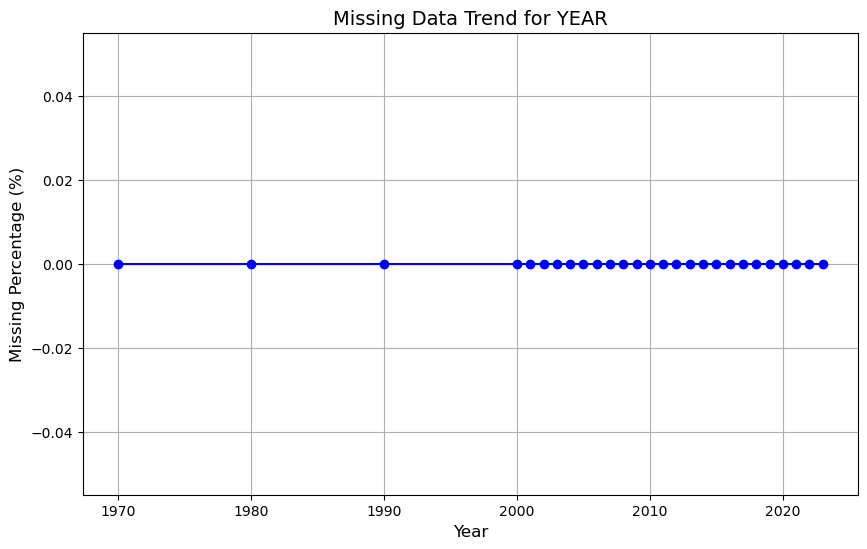

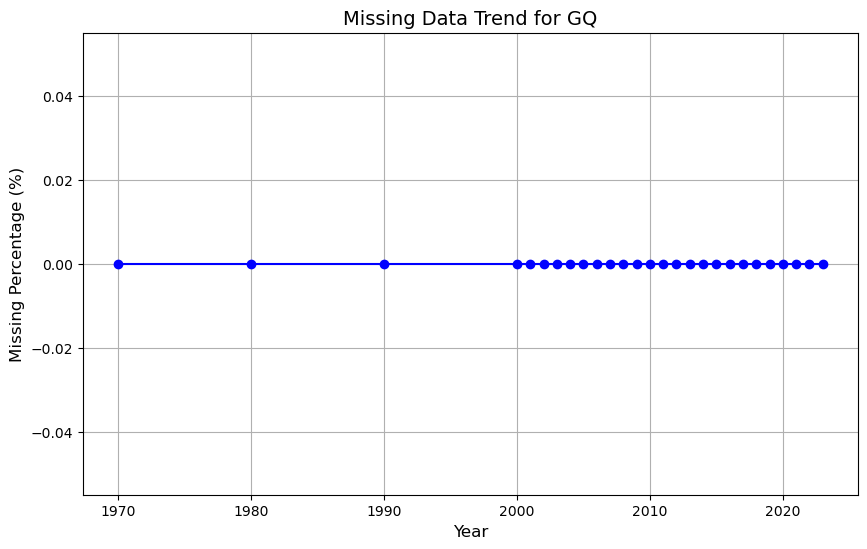

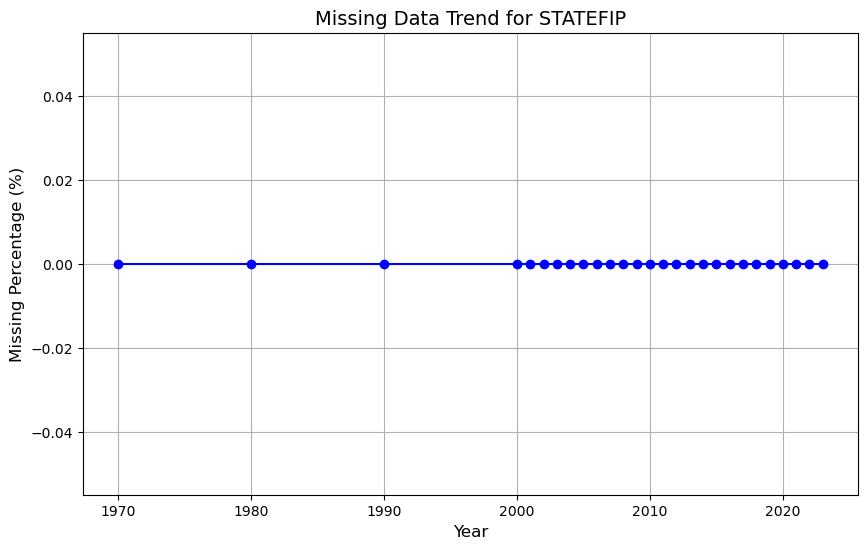

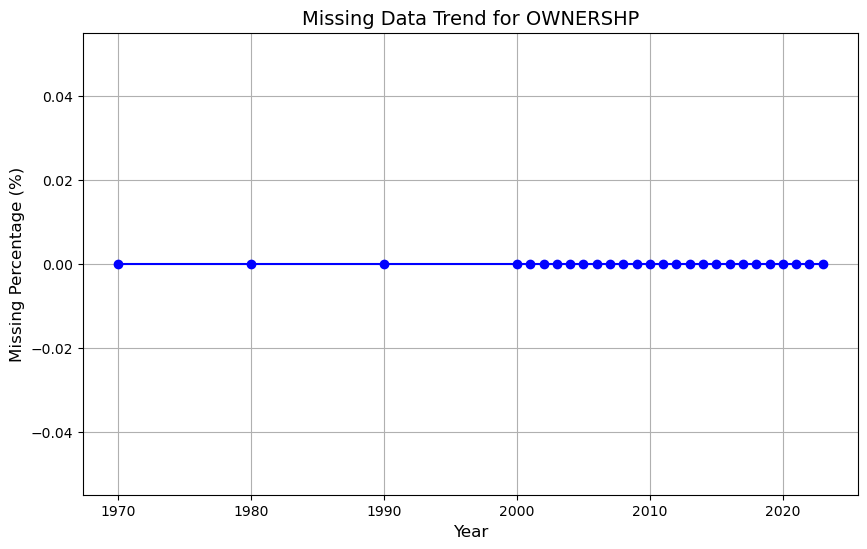

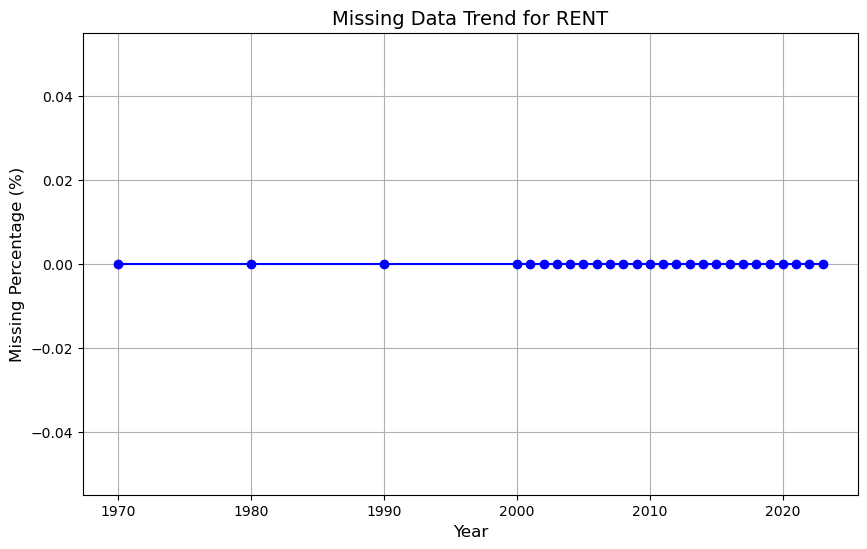

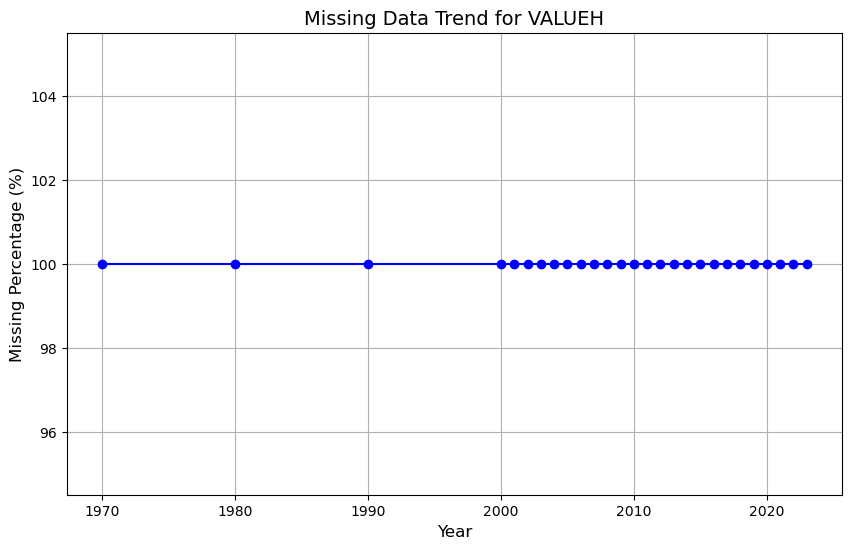

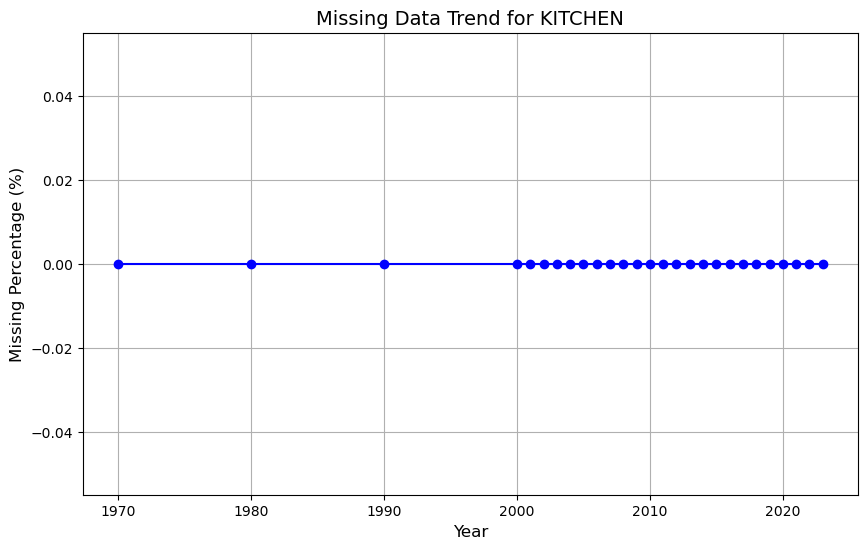

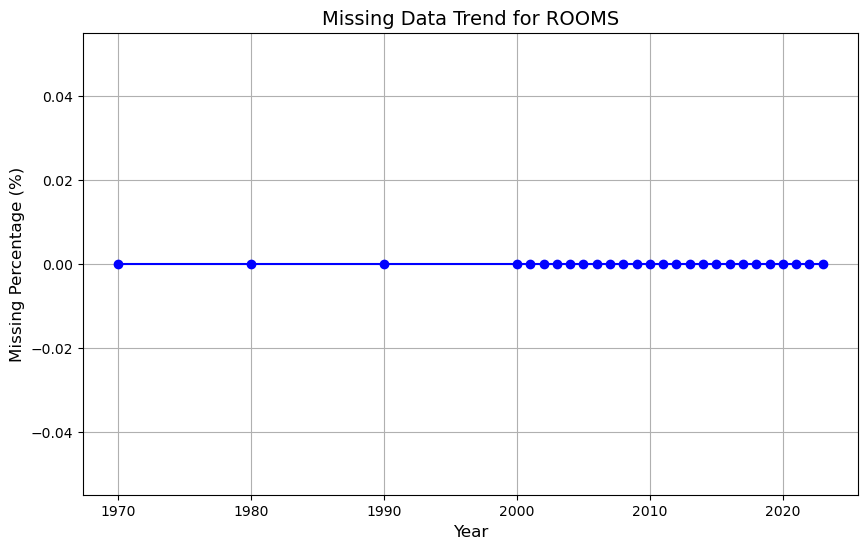

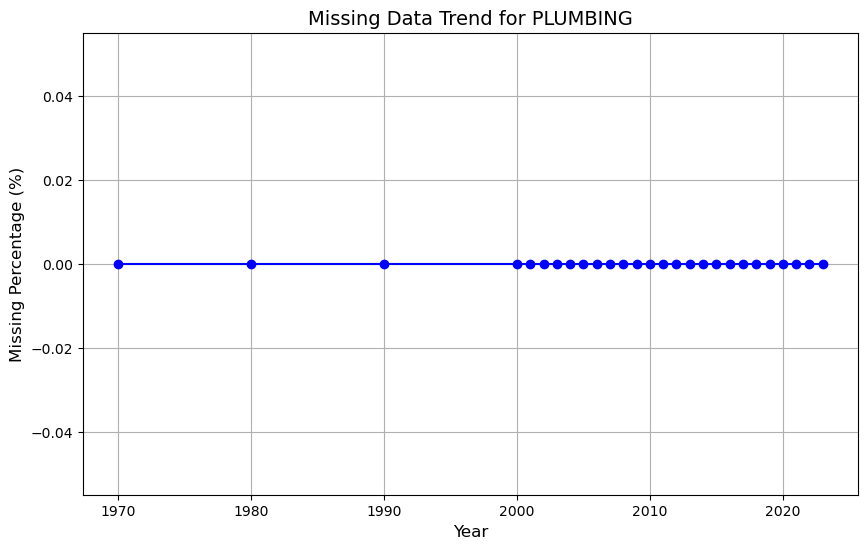

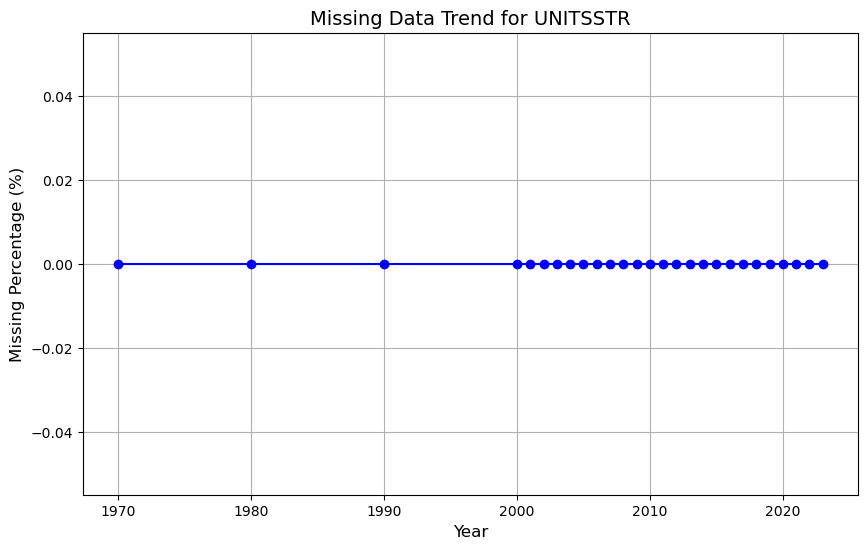

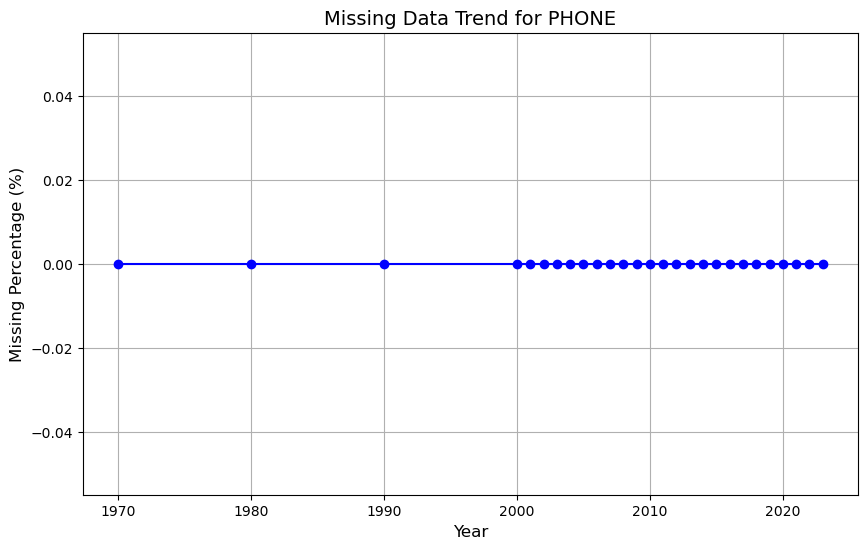

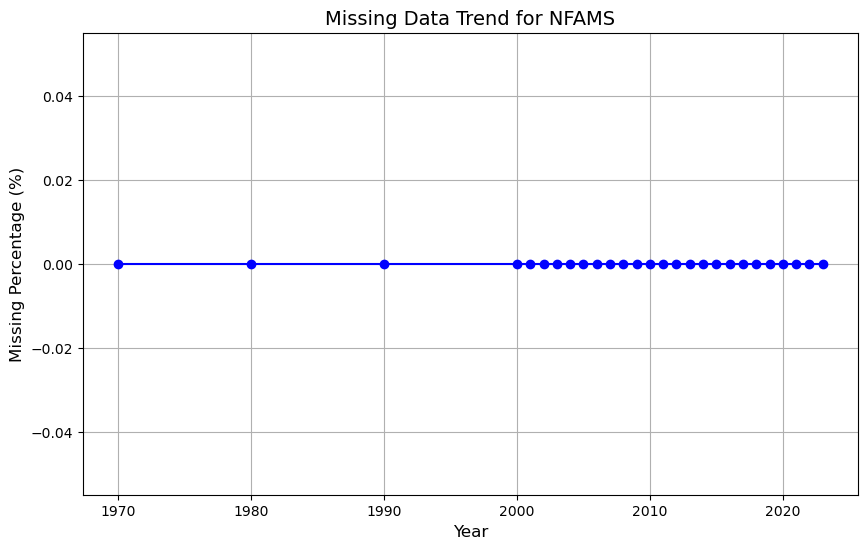

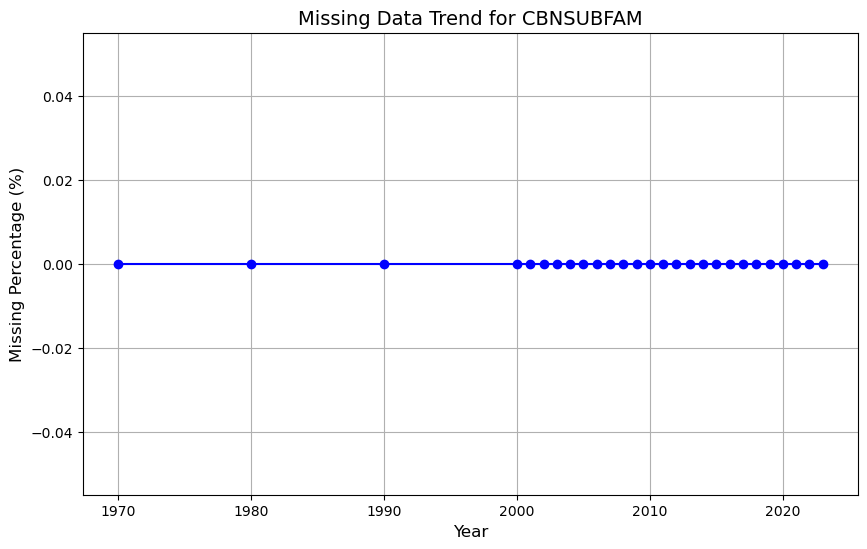

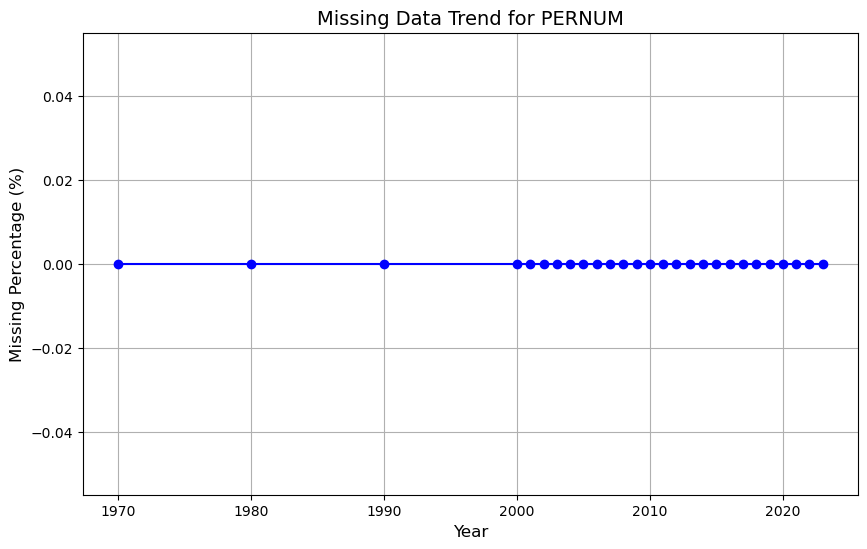

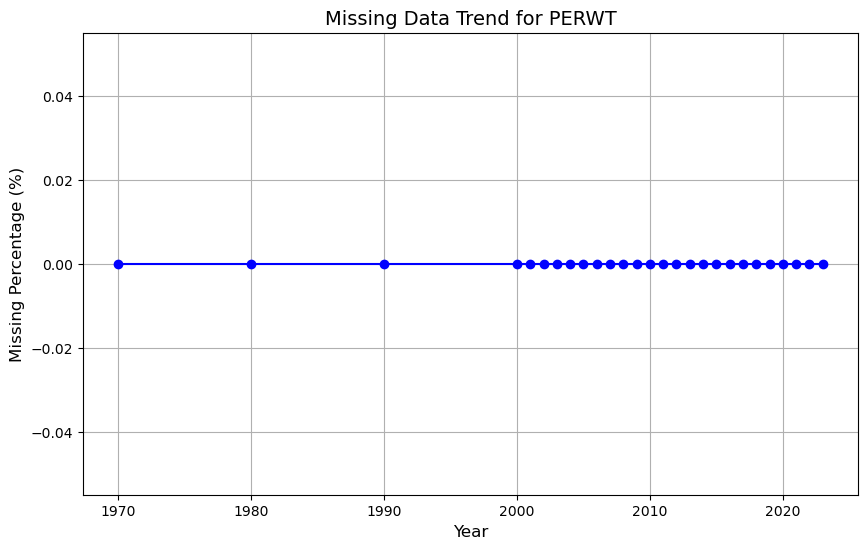

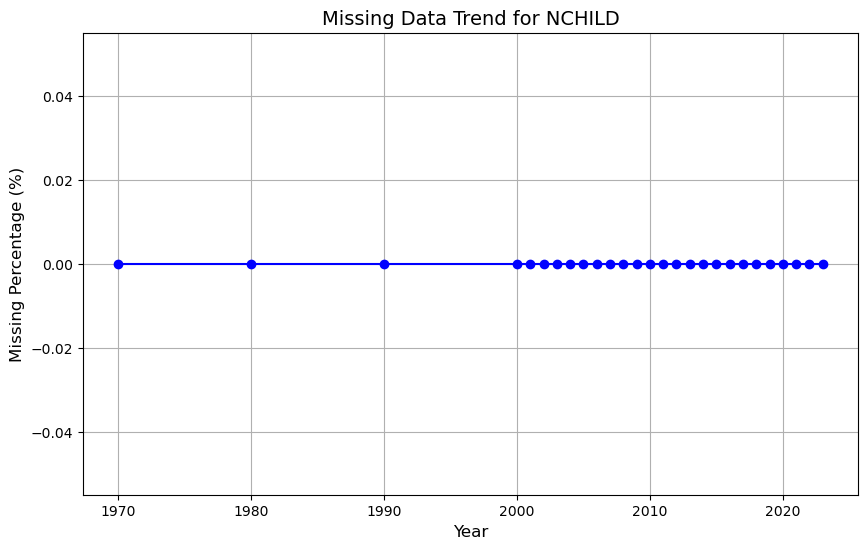

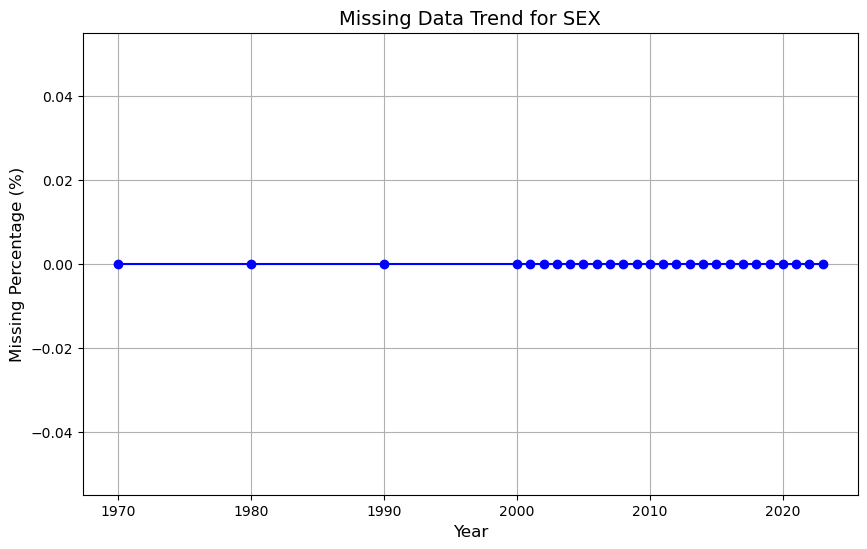

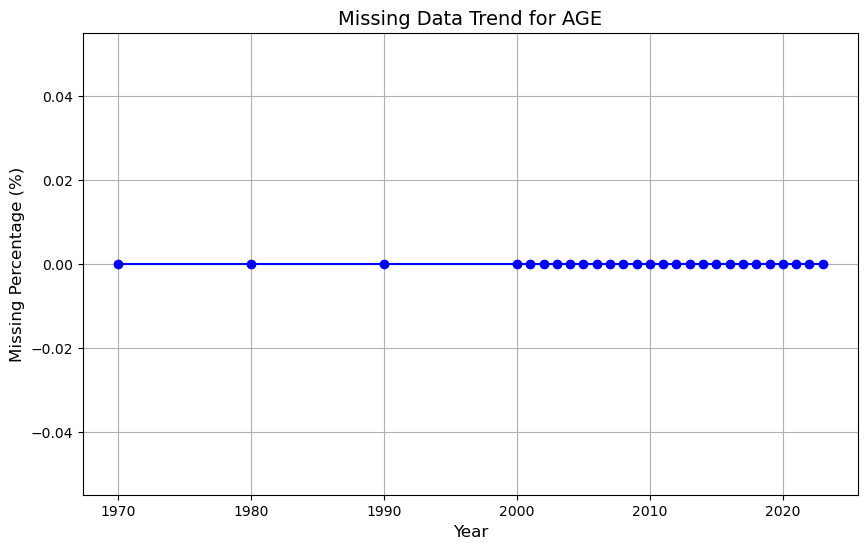

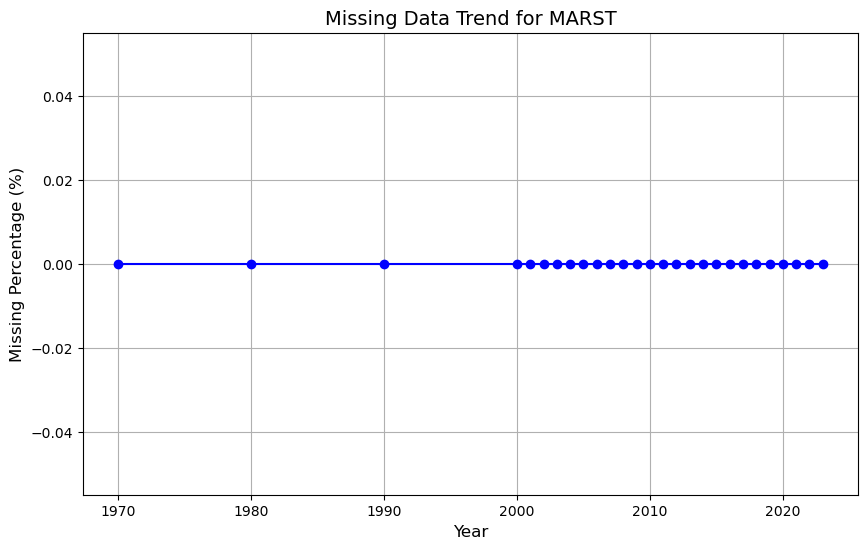

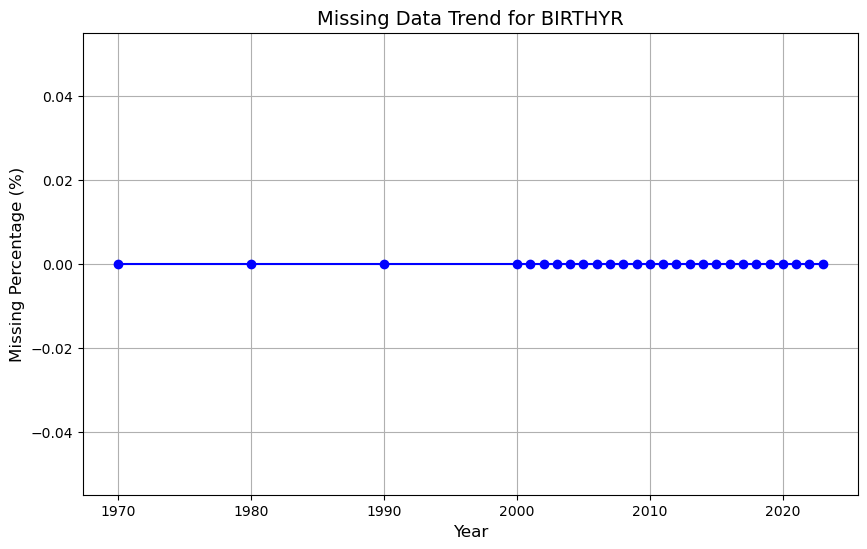

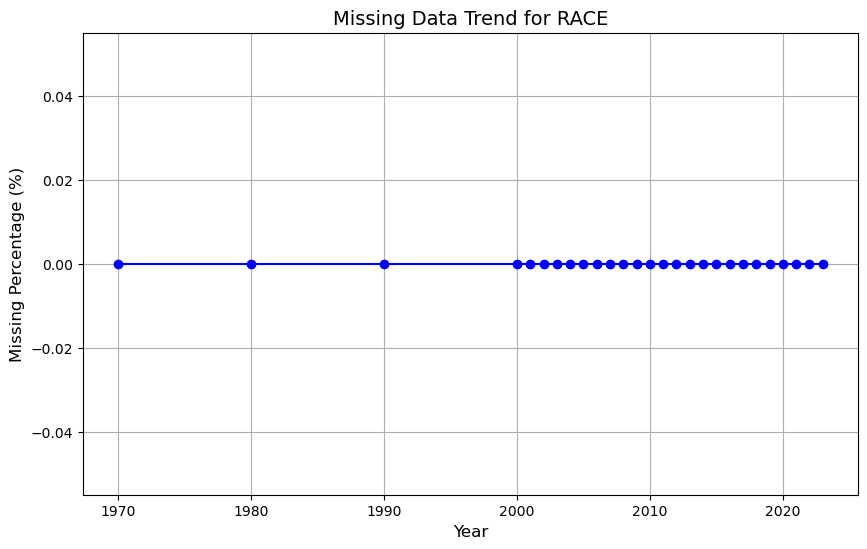

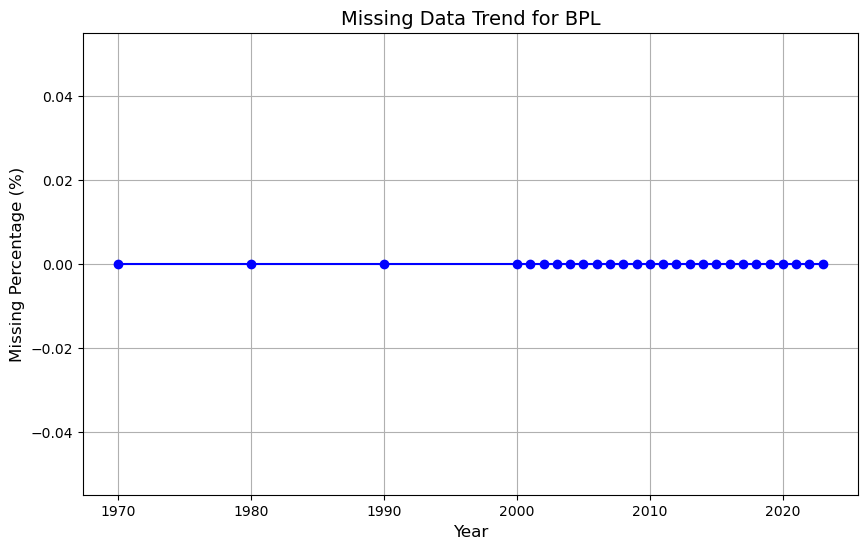

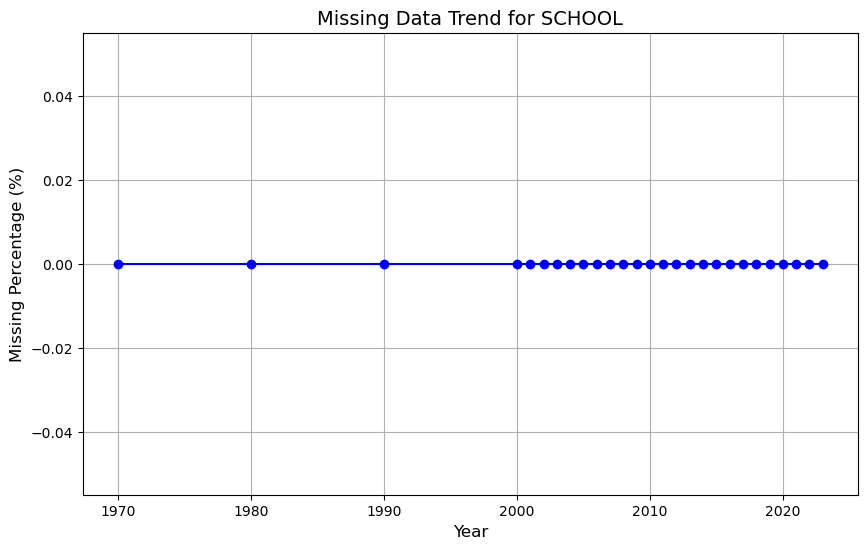

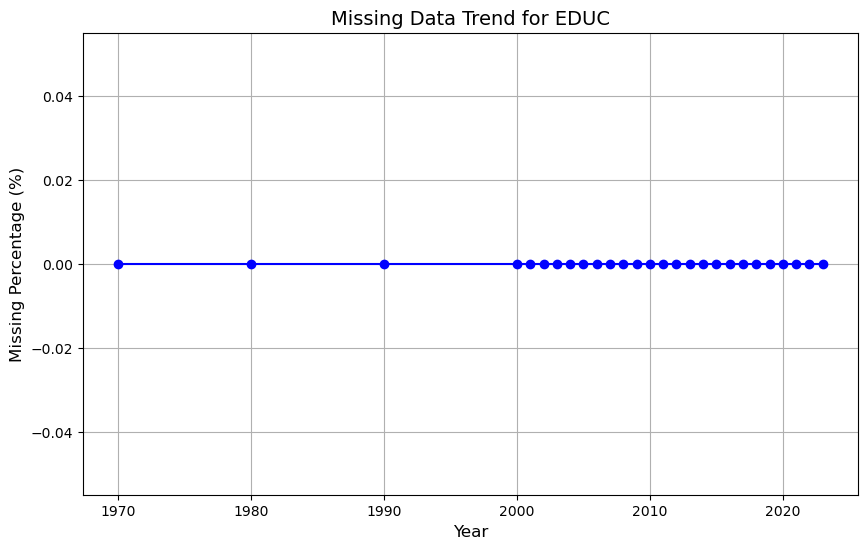

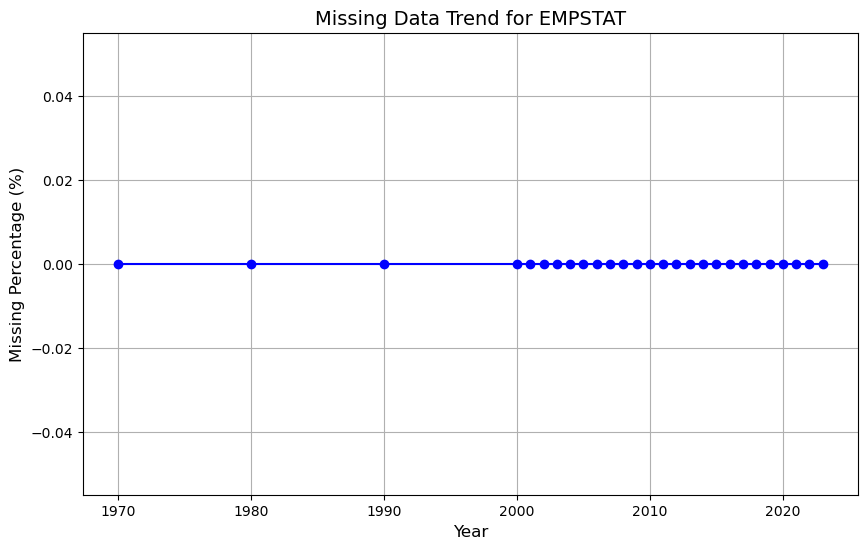

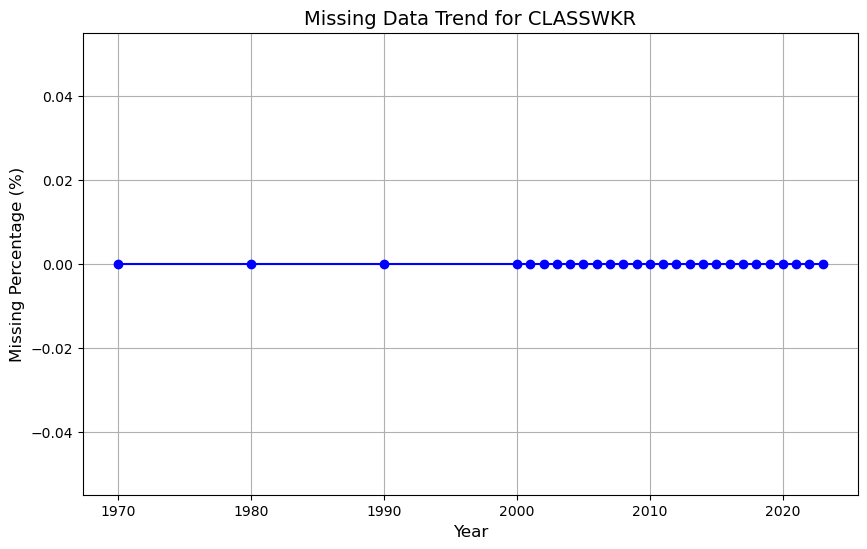

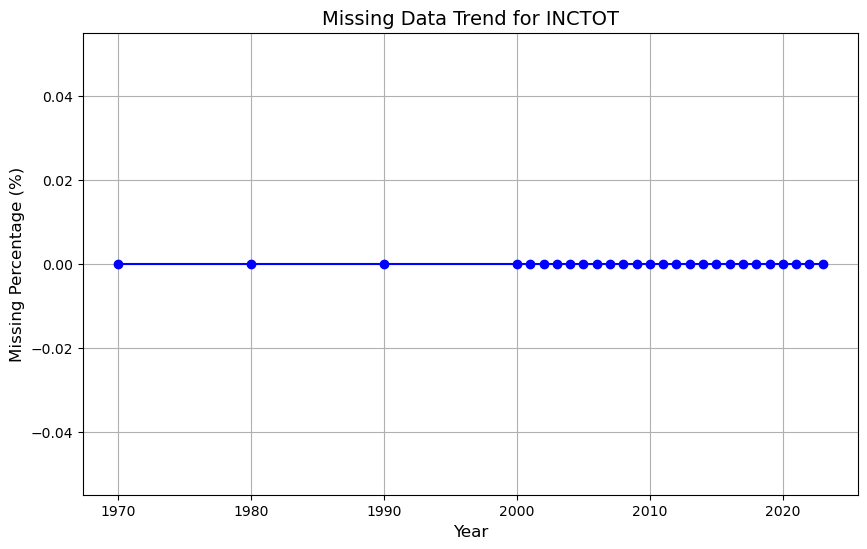

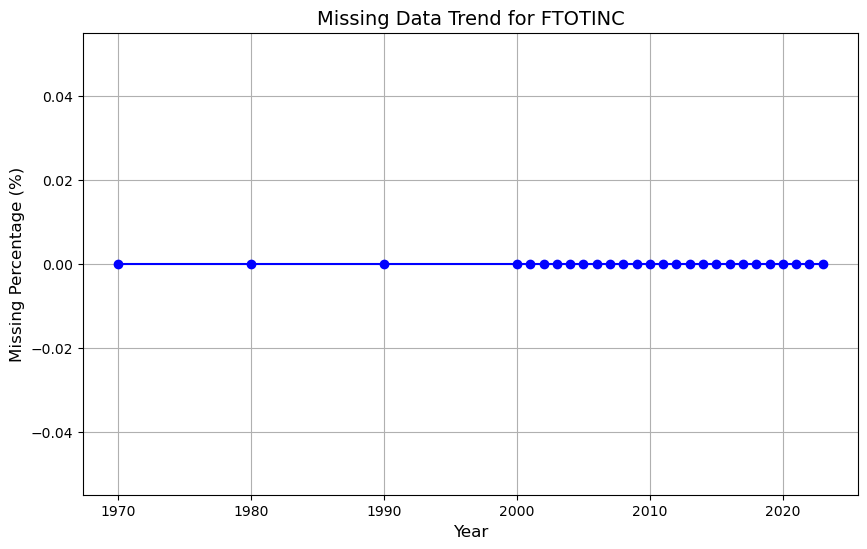

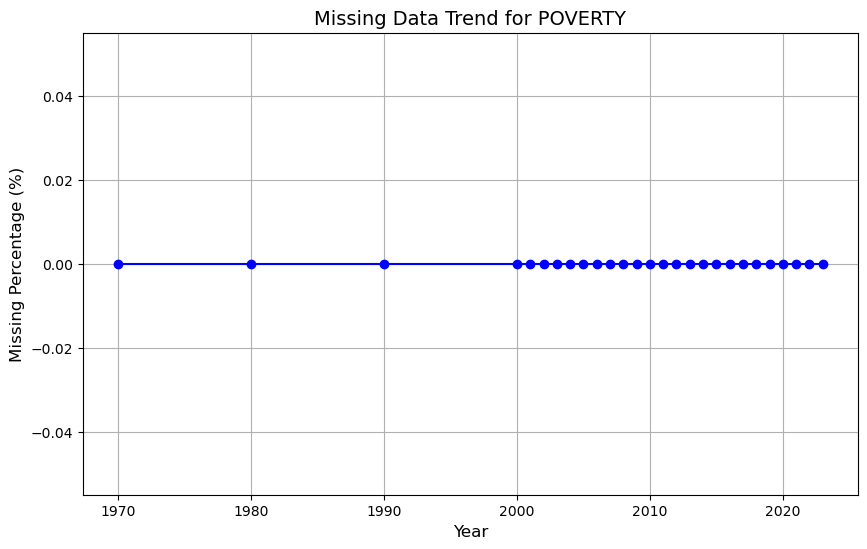

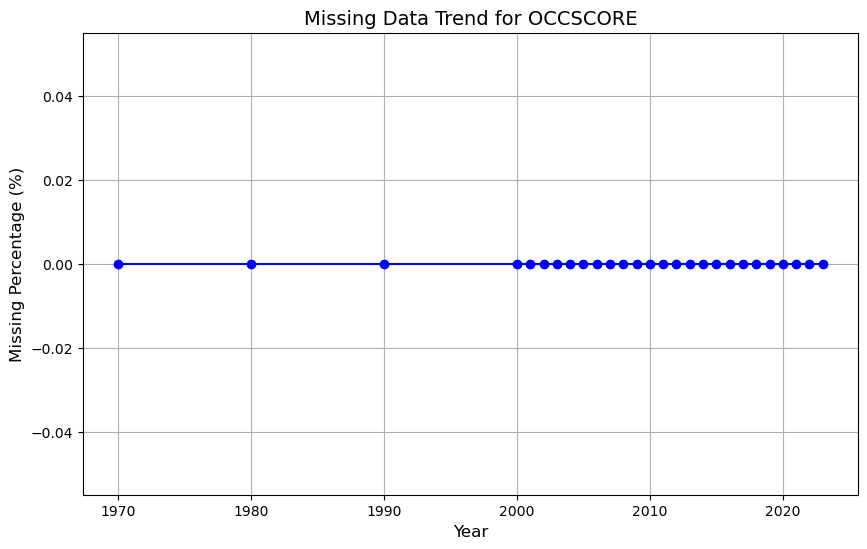

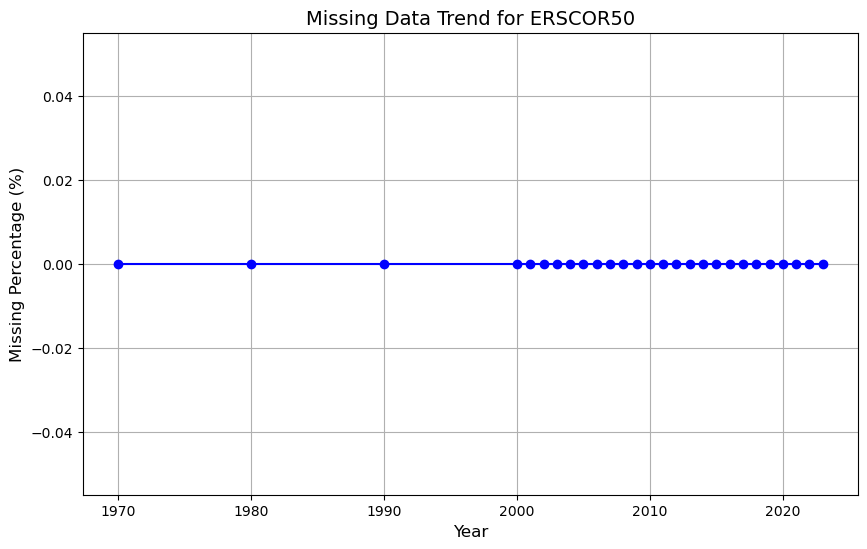

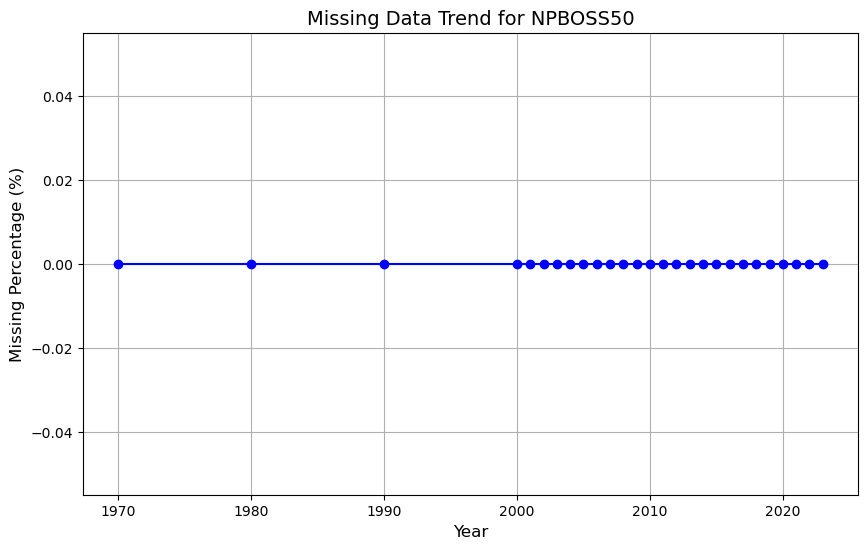

In [ ]:
folder_path = 'Yearly Data/'
yearly_missing_data_before = analyze_missing_data(folder_path, missing_indicators)

### PreProcess Data
- `Yearly Data/` ==> `Preprocessed Data/`
    - Step 1: Filter rows based on birth year (1946–2006)
    - Step 2: Filter rows based on age (>= 18)
    - Step 3: Drop rows where OWNERSHP is missing
    - Step 4: Drop rows where both VALUEH and RENT are missing

In [ ]:
folder_path = 'Yearly Data/'
output_folder = 'Preprocessed Data/'

os.makedirs(output_folder, exist_ok=True)

for file_name in os.listdir(folder_path):
    if file_name.endswith('.csv'):
        file_path = os.path.join(folder_path, file_name)
        df = pd.read_csv(file_path)

        # Step 1: Filter rows based on birth year (1946–2006)
        if 'BIRTHYR' in df.columns:
            df = df[(df['BIRTHYR'] >= 1946) & (df['BIRTHYR'] <= 2006)]

        # Step 2: Filter rows based on age (>= 18)
        if 'AGE' in df.columns:
            df = df[df['AGE'] >= 18]

        # Step 3: Drop rows where OWNERSHP is missing
        if 'OWNERSHP' in df.columns:
            missing_ownership = df['OWNERSHP'].isin(missing_indicators.get('OWNERSHP', [])) | df['OWNERSHP'].isna()
            df = df[~missing_ownership]

        # Step 4: Drop rows where both VALUEH and RENT are missing
        if 'VALUEH' in df.columns and 'RENT' in df.columns:
            missing_valueh = df['VALUEH'].isin(missing_indicators.get('VALUEH', [])) | df['VALUEH'].isna()
            missing_rent = df['RENT'].isin(missing_indicators.get('RENT', [])) | df['RENT'].isna()
            df = df[~(missing_valueh & missing_rent)]

        output_file_path = os.path.join(output_folder, file_name)
        df.to_csv(output_file_path, index=False)
        print(file_name,'=',len(df))

print(f"Preprocessing completed. Files saved to {output_folder}.")

### Process Data
- `Preprocessed Data/` ==> `Processed Data/`
    - Step 1: Drop Columns (features to remove)
    - Step 2: Drop rows with missing data in preserved features

In [ ]:
folder_path = 'Preprocessed Data/'
output_folder = 'Processed Data/'

features_to_remove = ['SERIAL', 'SAMPLE', 'HHWT', 'CBSERIAL', 'CLUSTER', 'STRATA', 'PERNUM','PERWT', # identifiers 
                       'CARPOOL', 'RIDERS', # 100 % missing in 1970
                        'OWNERSHPD', 'RACED', 'BPLD', 'EDUCD', 'EMPSTATD', 'CLASSWKRD', 'VETSTATD', # detailed versions of general variables
                        'COSTFUEL', # +95 % missing in 1970
                        'VACANCY', # 100% missing from all somehow?
                        'VETSTAT', # too much missing
                        # 'VALUEH', # 100% missing when droping RENT
                        'COSTELEC', 'COSTGAS', 'COSTWATR', # Option 1
                        # 'RENT',  # Option 2
                        'CLASSWKR', 
                        'GQ', 
] 

preserve_features = [
                    'OCCSCORE', 'YNGCH' 
                    # 'COSTELEC', 'COSTGAS', 'COSTWATR',
]

os.makedirs(output_folder, exist_ok=True)

for file_name in os.listdir(folder_path):
    if file_name.endswith('.csv'):
        file_path = os.path.join(folder_path, file_name)
        df = pd.read_csv(file_path)

        # Step 1: Drop Columns (features to remove)
        df = df.drop(columns=features_to_remove, errors='ignore')

        # Step 2: Drop rows with missing data in preserved features
        for column in preserve_features:
            if column in df.columns:
                missing_data = df[column].isin(missing_indicators.get(column, [])) | df[column].isna()
                df = df[~missing_data]

        output_file_path = os.path.join(output_folder, file_name)
        df.to_csv(output_file_path, index=False)

        print(file_name,'=',len(df))

print(f"Processing completed. Files saved to {output_folder}.")

year_1970.csv = 33835
year_1980.csv = 926161
year_1990.csv = 2381578
year_2000.csv = 3271893
year_2001.csv = 279494
year_2002.csv = 254960
year_2003.csv = 284578
year_2004.csv = 285544
year_2005.csv = 689182
year_2006.csv = 693783
year_2007.csv = 699653
year_2008.csv = 698499
year_2009.csv = 704775
year_2010.csv = 707632
year_2011.csv = 683794
year_2012.csv = 687265
year_2013.csv = 695740
year_2014.csv = 688447
year_2015.csv = 687282
year_2016.csv = 688989
year_2017.csv = 700176
year_2018.csv = 701793
year_2019.csv = 699983
year_2020.csv = 562170
year_2021.csv = 702532
year_2022.csv = 725733
year_2023.csv = 731925
Processing completed. Files saved to Processed Data/.


###  All Year Analysis of Proccesed Data
- Analyze `Processed Data/`

In [ ]:
folder_path = 'Processed Data/'
sample_file = next(file for file in os.listdir(folder_path) if file.endswith('.csv'))
sample_df = pd.read_csv(os.path.join(folder_path, sample_file))
all_features = sample_df.columns.tolist()
len(all_features) , all_features

(29,
 ['YEAR',
  'STATEFIP',
  'OWNERSHP',
  'RENT',
  'VALUEH',
  'KITCHEN',
  'ROOMS',
  'PLUMBING',
  'UNITSSTR',
  'PHONE',
  'NFAMS',
  'CBNSUBFAM',
  'NCHILD',
  'YNGCH',
  'SEX',
  'AGE',
  'MARST',
  'BIRTHYR',
  'RACE',
  'BPL',
  'SCHOOL',
  'EDUC',
  'EMPSTAT',
  'INCTOT',
  'FTOTINC',
  'POVERTY',
  'OCCSCORE',
  'ERSCOR50',
  'NPBOSS50'])

In [15]:
folder_path = 'Processed Data/'
for file_name in os.listdir(folder_path):
    if file_name.endswith('.csv'):
        year = file_name.split('_')[1].split('.')[0]
        file_path = os.path.join(folder_path, file_name)
        df = pd.read_csv(file_path)
        print(f"Year: {year}, Remaining Samples: {len(df)}")

Year: 1970, Remaining Samples: 33835
Year: 1980, Remaining Samples: 926161
Year: 1990, Remaining Samples: 2381578
Year: 2000, Remaining Samples: 3271893
Year: 2001, Remaining Samples: 279494
Year: 2002, Remaining Samples: 254960
Year: 2003, Remaining Samples: 284578
Year: 2004, Remaining Samples: 285544
Year: 2005, Remaining Samples: 689182
Year: 2006, Remaining Samples: 693783
Year: 2007, Remaining Samples: 699653
Year: 2008, Remaining Samples: 698499
Year: 2009, Remaining Samples: 704775
Year: 2010, Remaining Samples: 707632
Year: 2011, Remaining Samples: 683794
Year: 2012, Remaining Samples: 687265
Year: 2013, Remaining Samples: 695740
Year: 2014, Remaining Samples: 688447
Year: 2015, Remaining Samples: 687282
Year: 2016, Remaining Samples: 688989
Year: 2017, Remaining Samples: 700176
Year: 2018, Remaining Samples: 701793
Year: 2019, Remaining Samples: 699983
Year: 2020, Remaining Samples: 562170
Year: 2021, Remaining Samples: 702532
Year: 2022, Remaining Samples: 725733
Year: 2023,


Year: 1970
YEAR: 0.00% missing
STATEFIP: 0.00% missing
OWNERSHP: 0.00% missing
RENT: 29.95% missing
VALUEH: 70.05% missing
KITCHEN: 0.00% missing
ROOMS: 0.00% missing
PLUMBING: 0.00% missing
UNITSSTR: 0.00% missing
PHONE: 0.00% missing
NFAMS: 0.00% missing
CBNSUBFAM: 0.00% missing
NCHILD: 0.00% missing
YNGCH: 0.00% missing
SEX: 0.00% missing
AGE: 0.00% missing
MARST: 0.00% missing
BIRTHYR: 0.00% missing
RACE: 0.00% missing
BPL: 0.00% missing
SCHOOL: 0.00% missing
EDUC: 0.00% missing
EMPSTAT: 0.00% missing
INCTOT: 0.00% missing
FTOTINC: 0.00% missing
POVERTY: 0.00% missing
OCCSCORE: 0.00% missing
ERSCOR50: 0.00% missing
NPBOSS50: 0.00% missing

Year: 1980
YEAR: 0.00% missing
STATEFIP: 0.00% missing
OWNERSHP: 0.00% missing
RENT: 59.60% missing
VALUEH: 40.40% missing
KITCHEN: 0.00% missing
ROOMS: 0.00% missing
PLUMBING: 0.00% missing
UNITSSTR: 0.00% missing
PHONE: 0.00% missing
NFAMS: 0.00% missing
CBNSUBFAM: 0.00% missing
NCHILD: 0.00% missing
YNGCH: 0.00% missing
SEX: 0.00% missing
AGE

C:\Users\Matin\AppData\Local\Temp\ipykernel_42776\2250371754.py:55: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(10, 6))


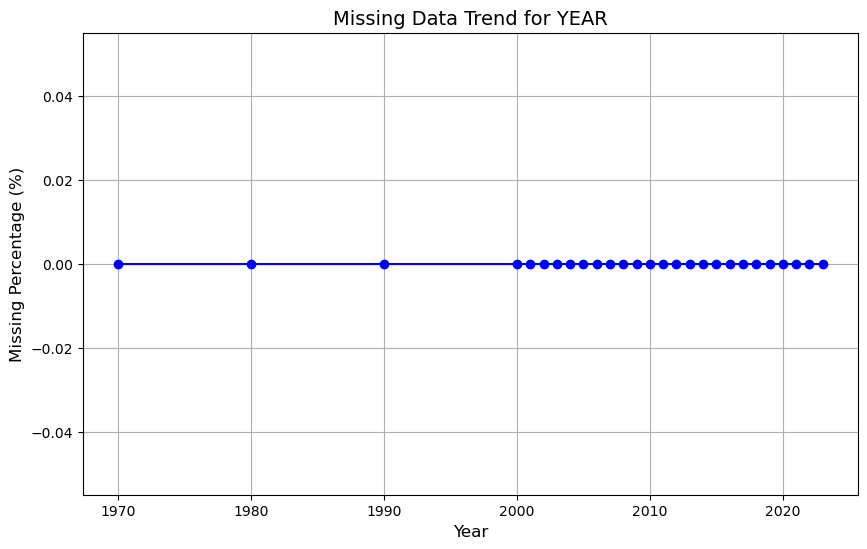

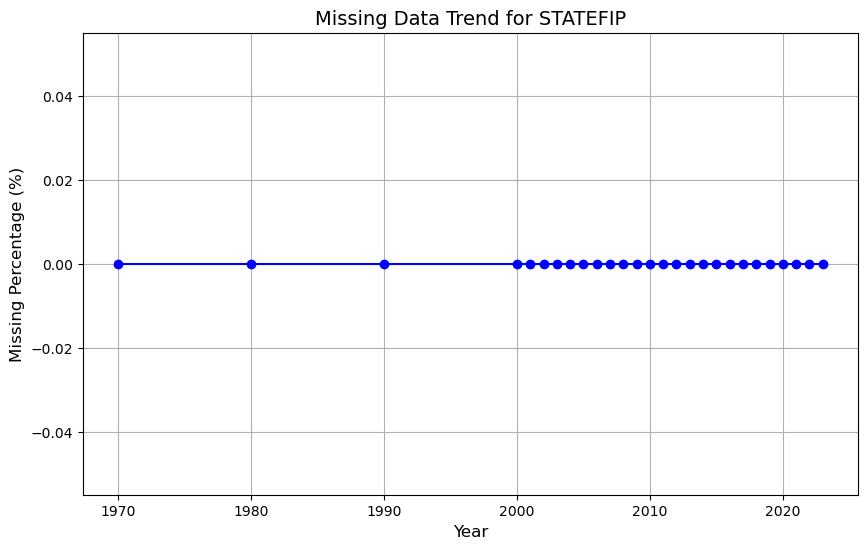

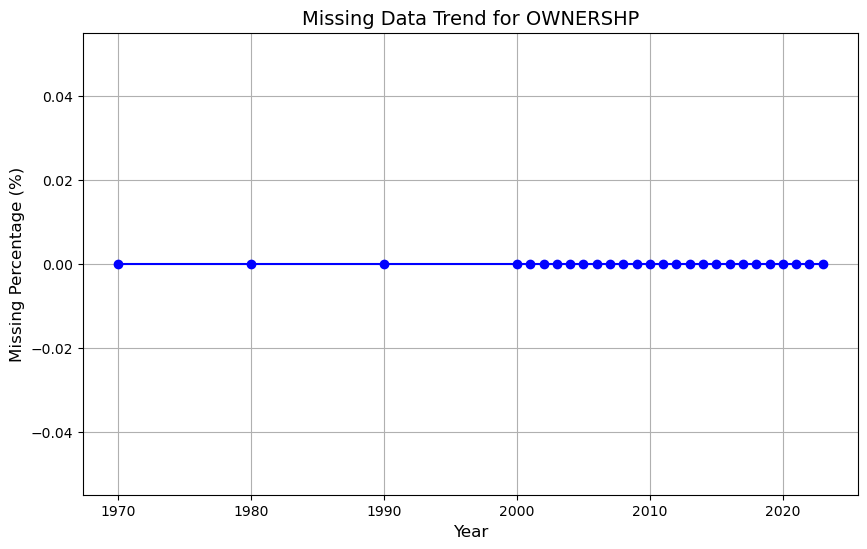

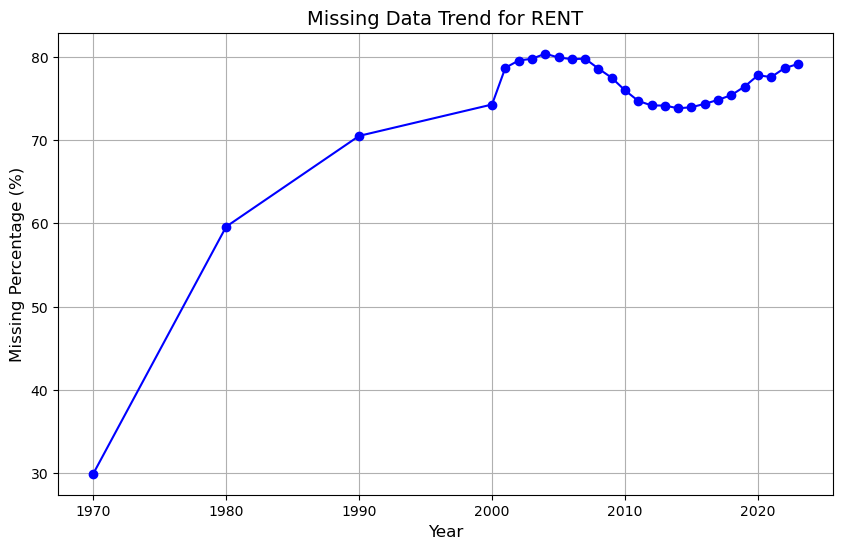

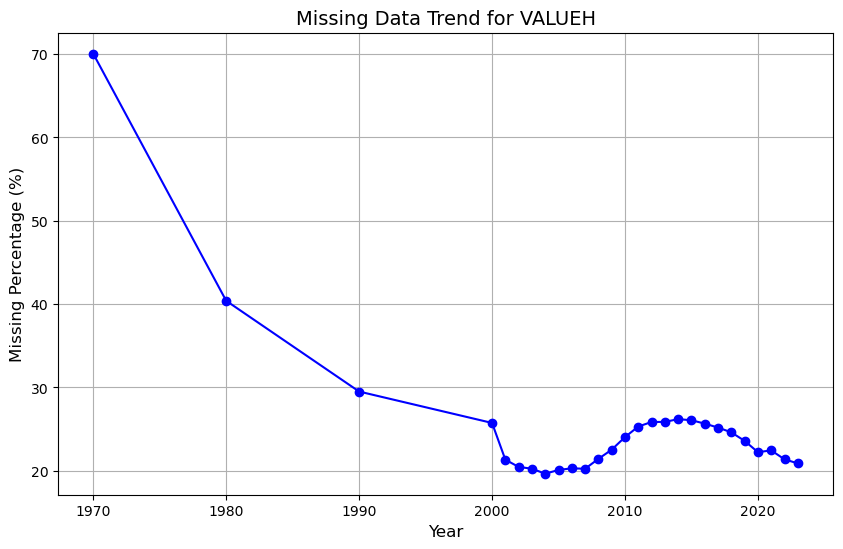

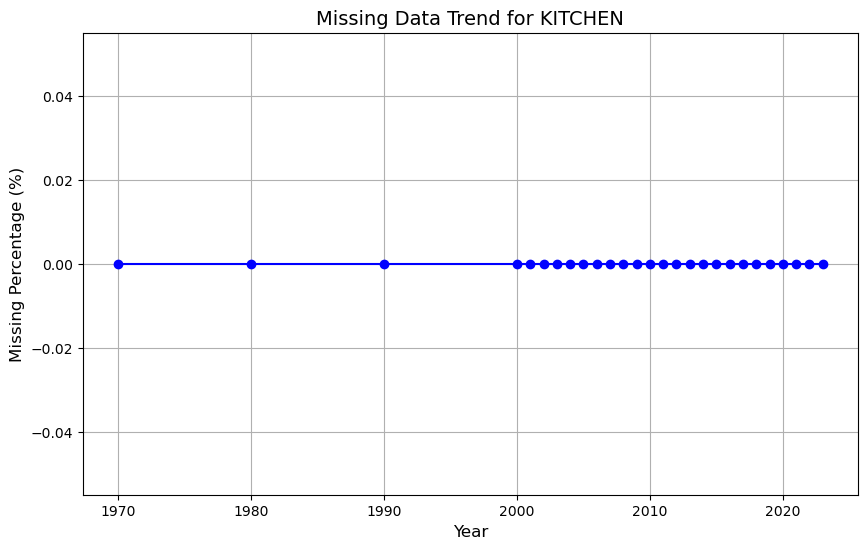

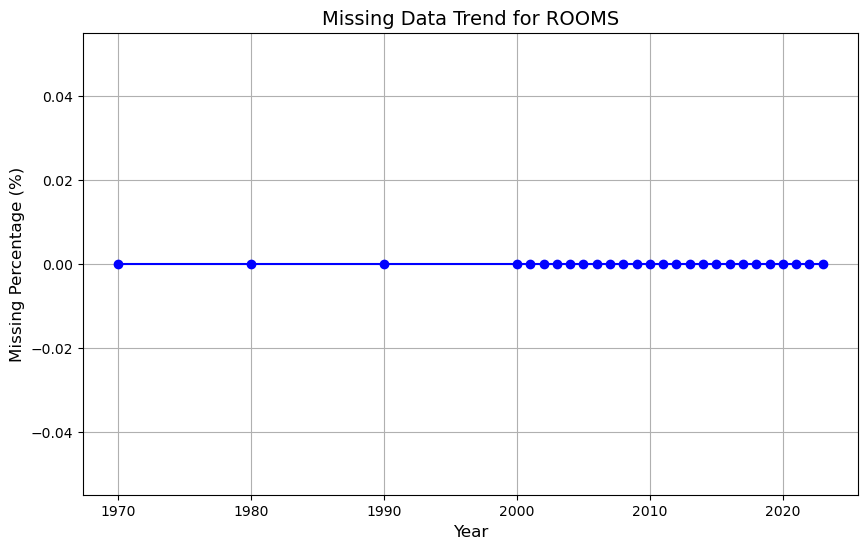

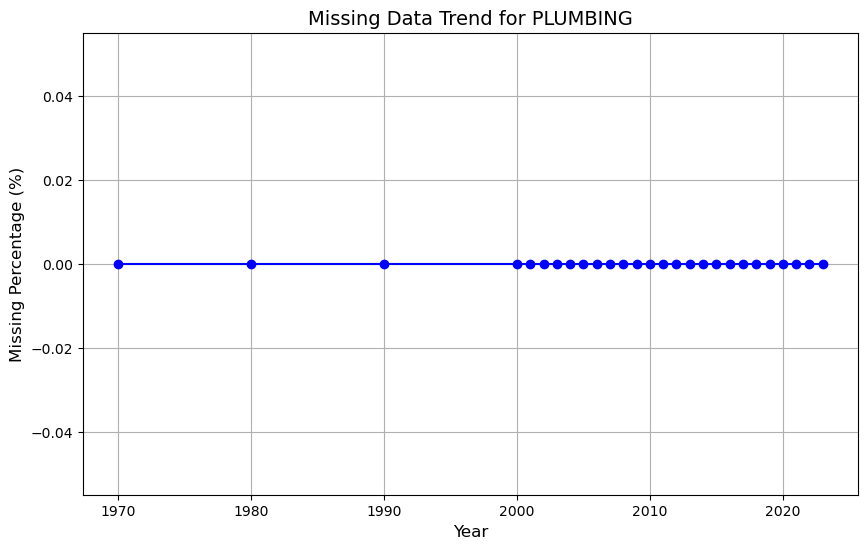

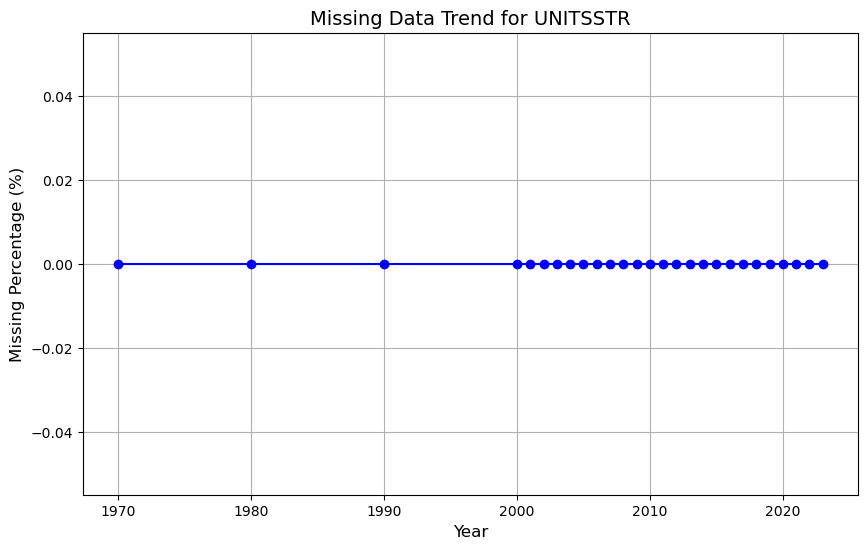

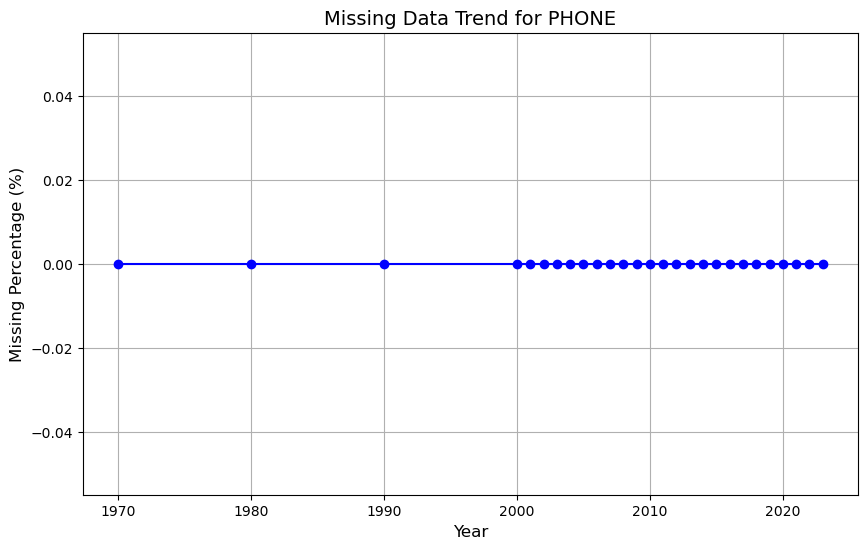

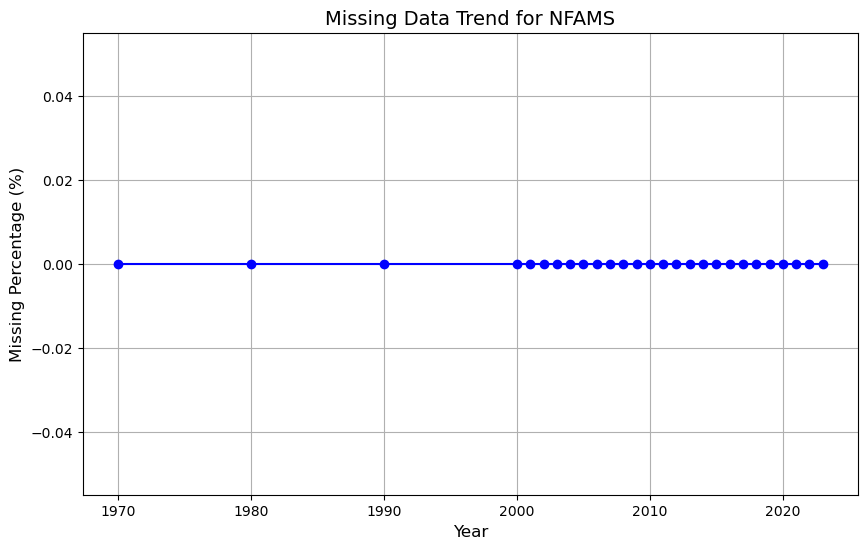

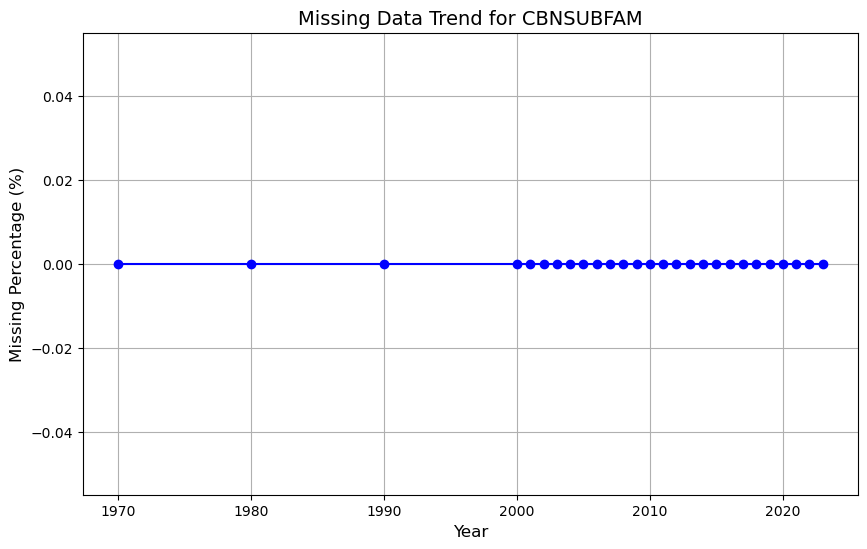

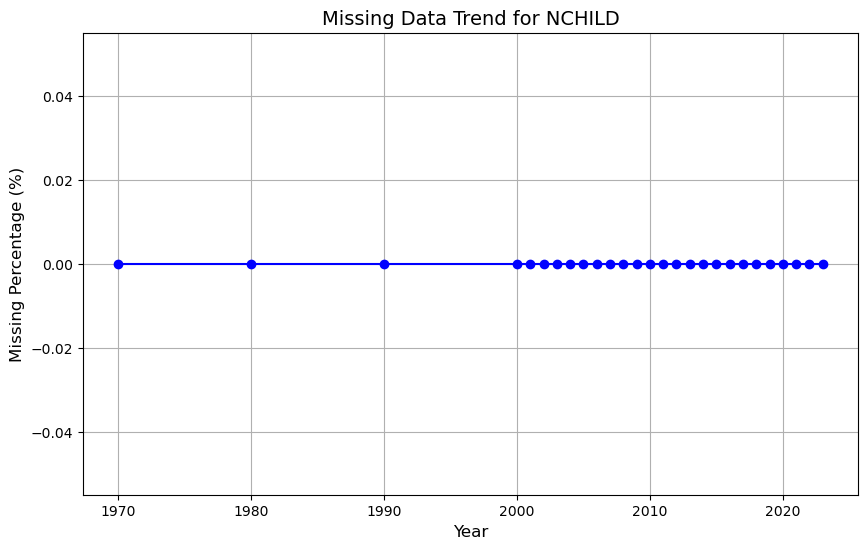

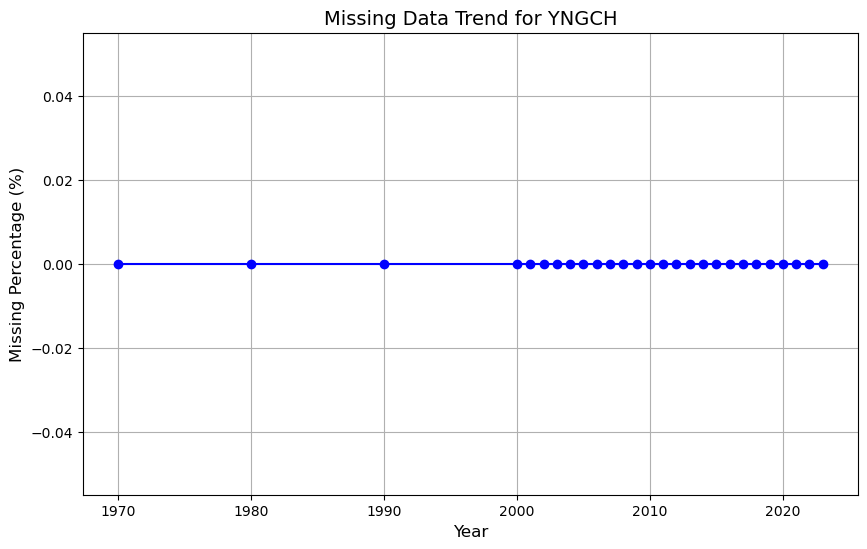

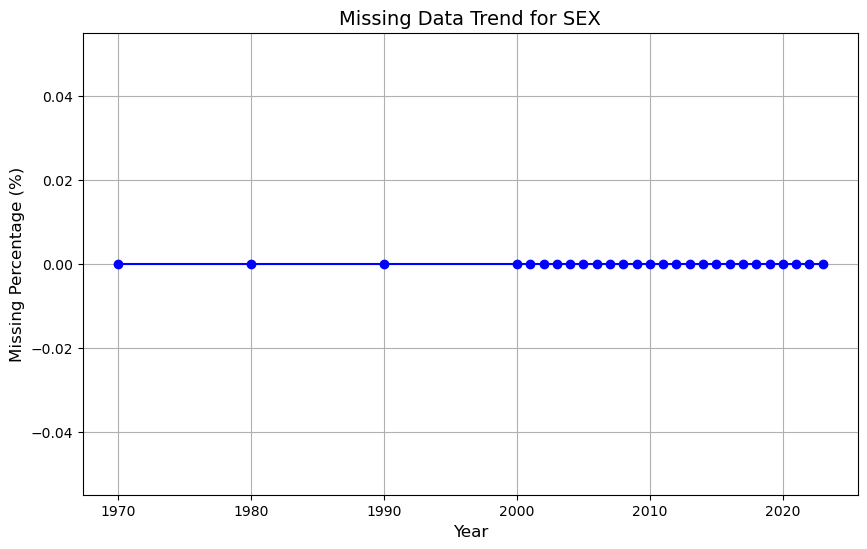

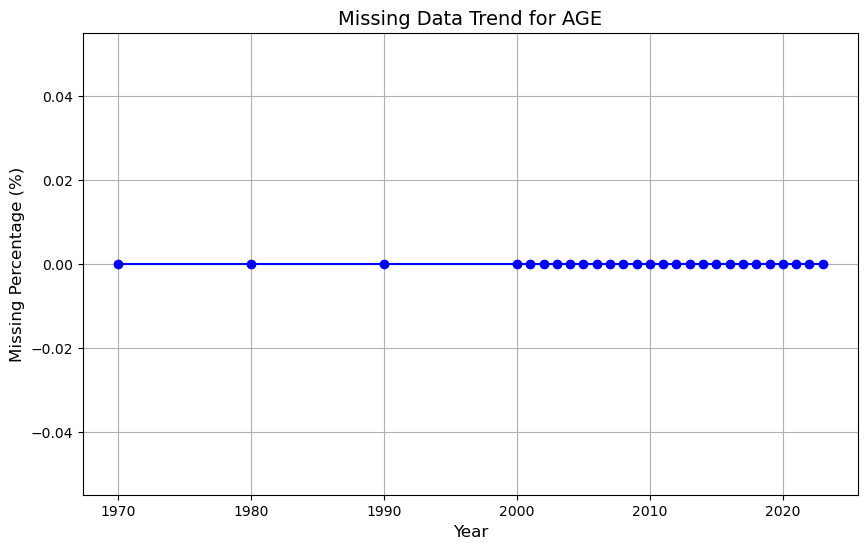

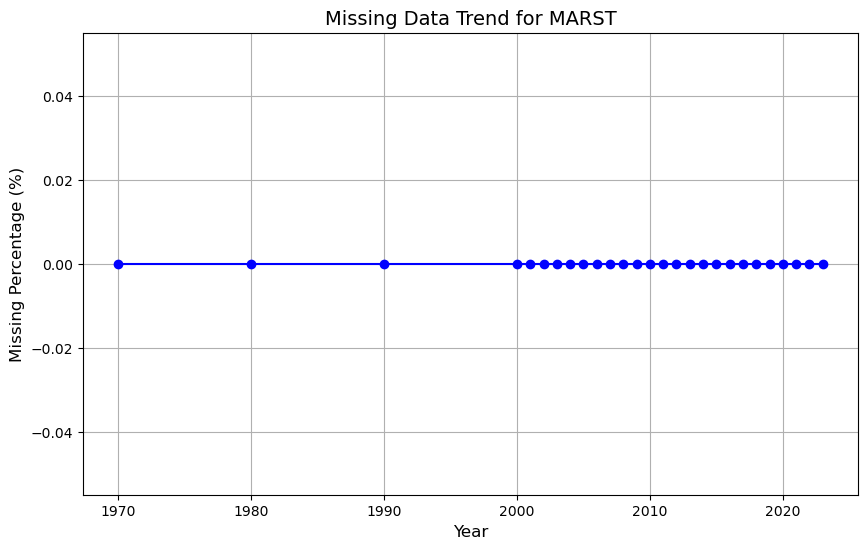

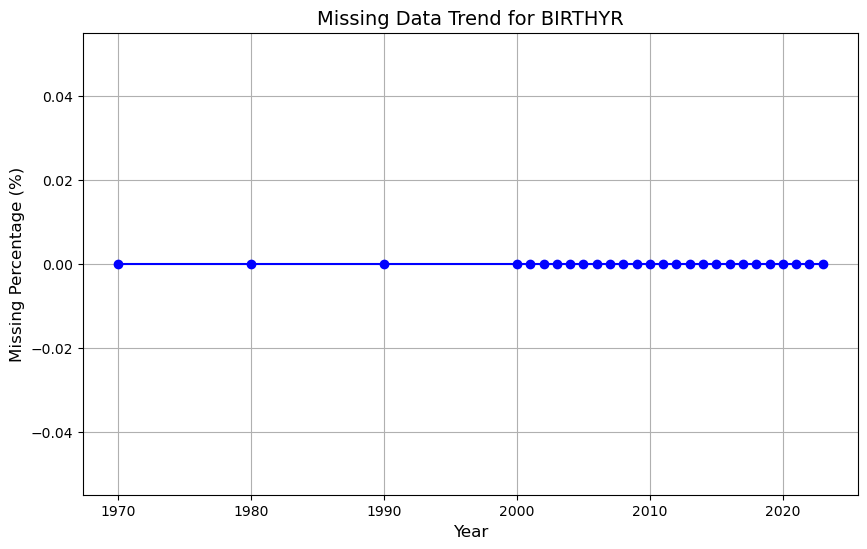

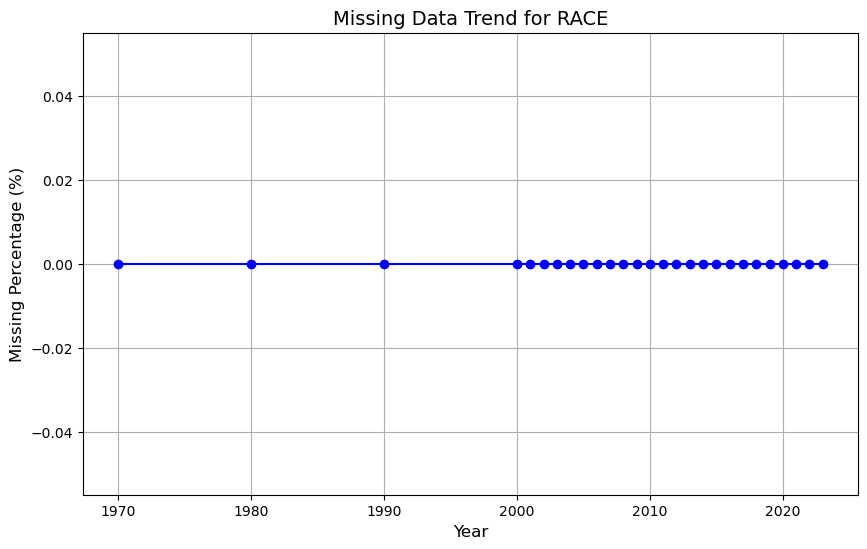

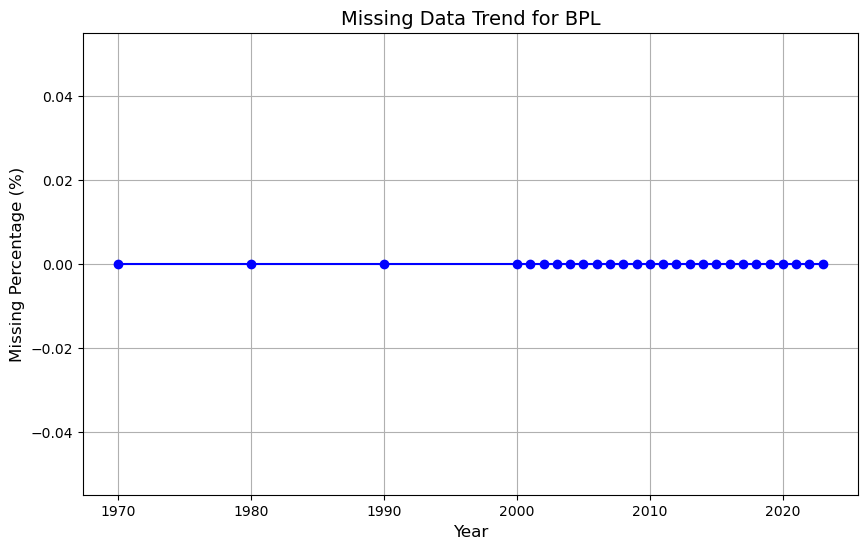

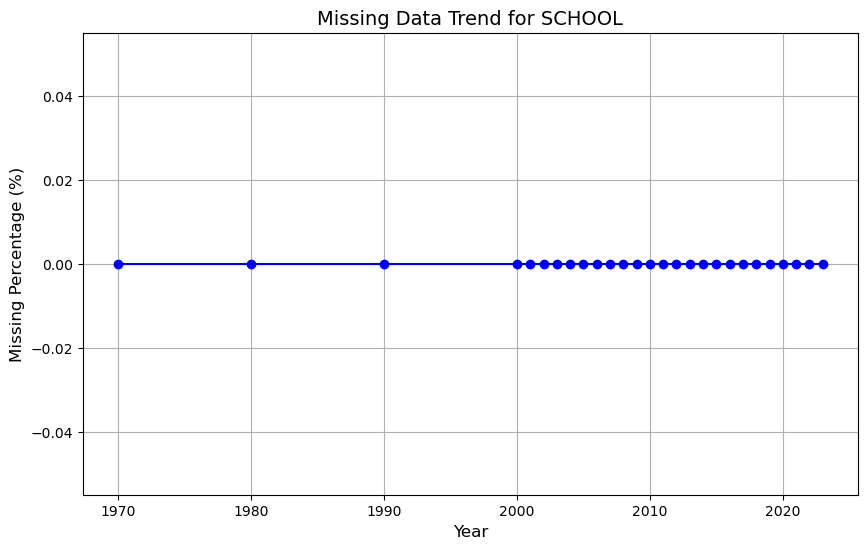

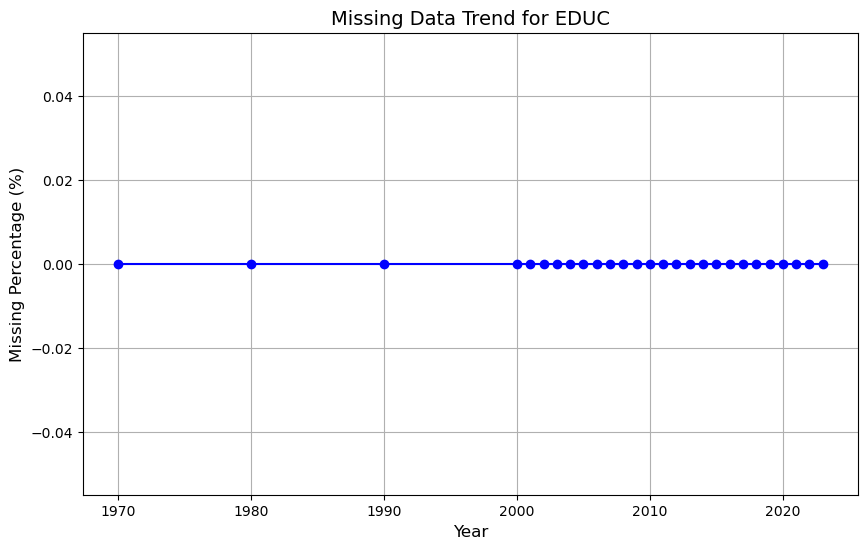

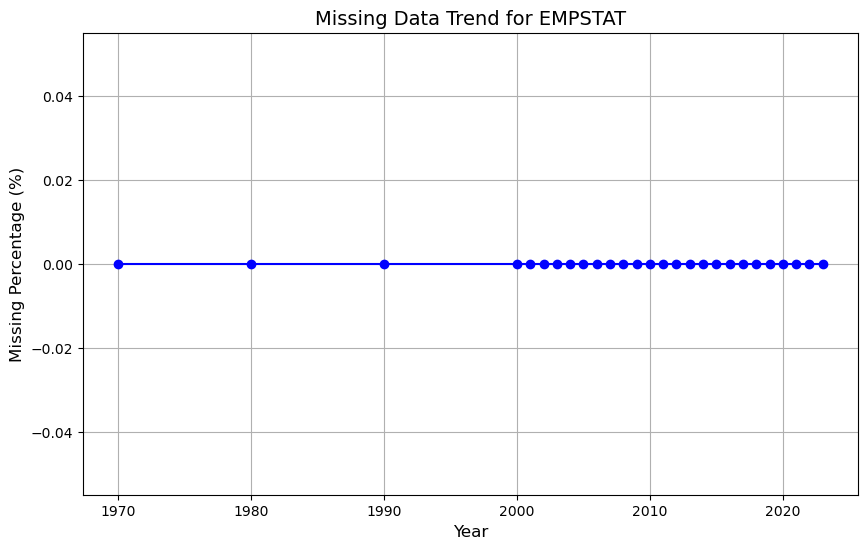

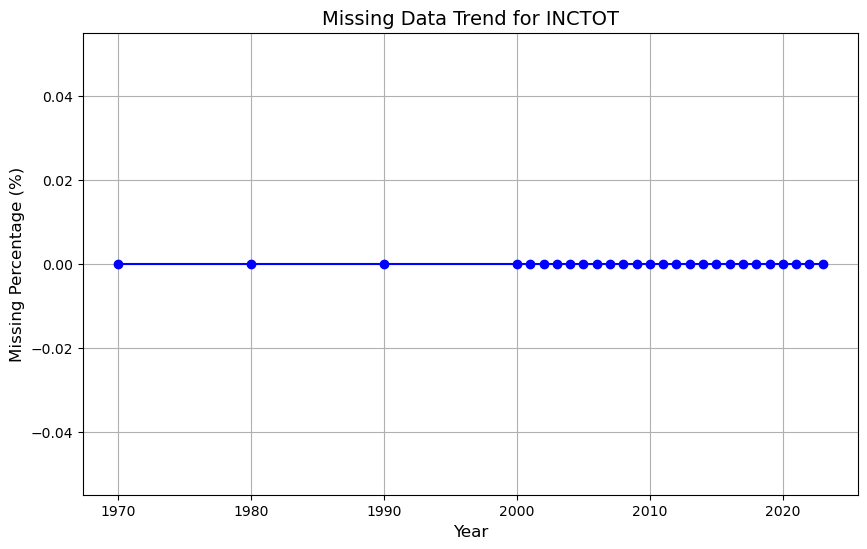

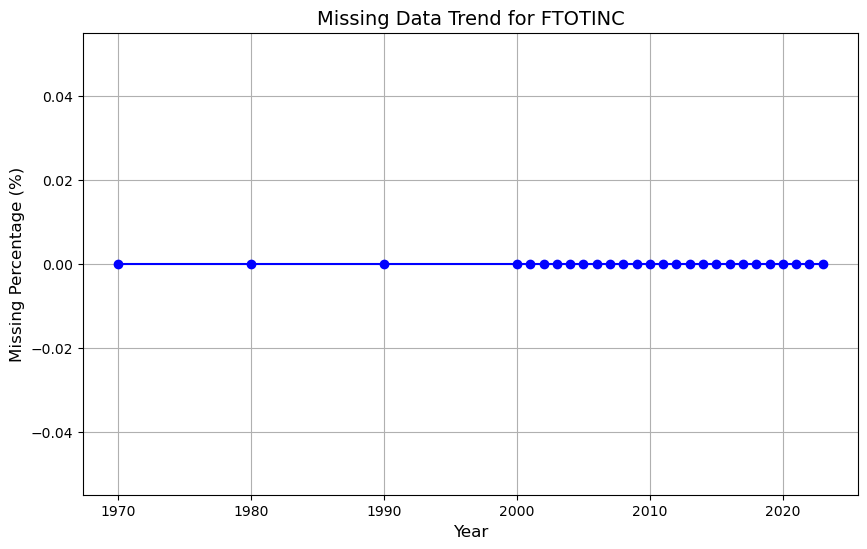

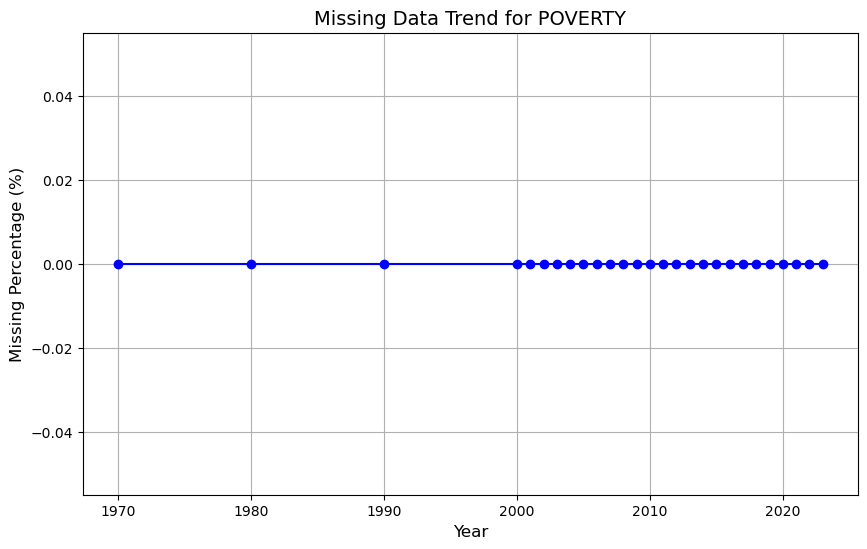

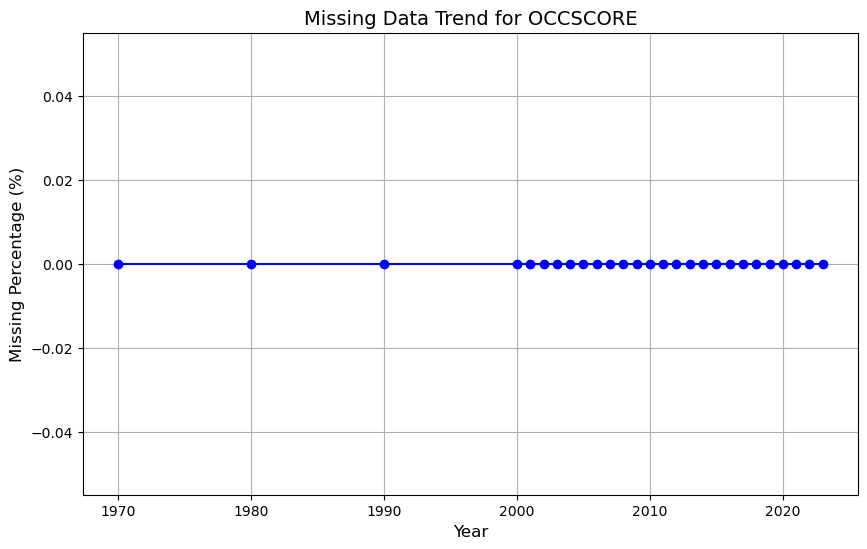

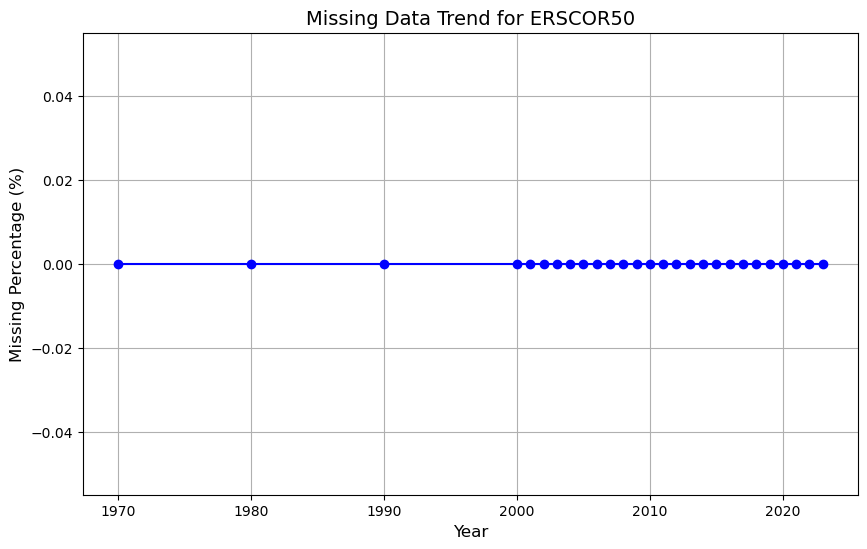

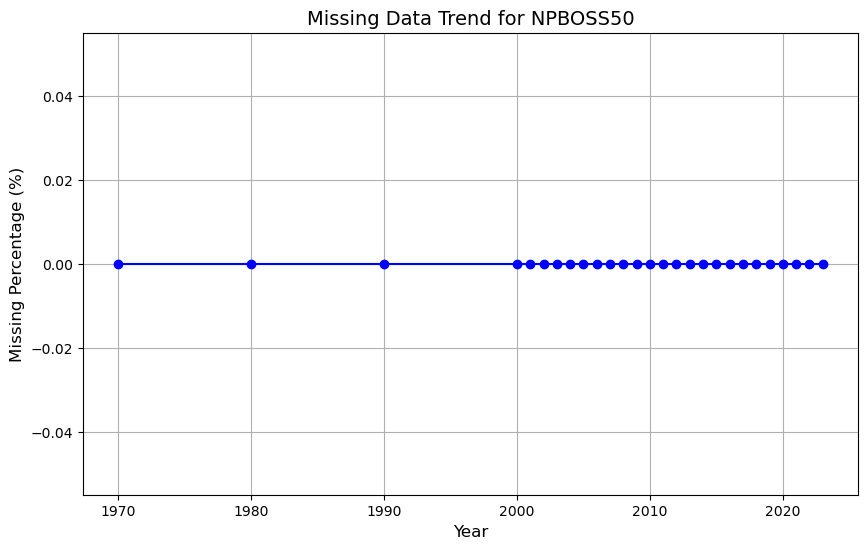

In [16]:
folder_path = 'Processed Data/'
yearly_missing_data_after = analyze_missing_data(folder_path, missing_indicators)

###  Final Proccesing
- Read `Processed Data/` creates `Final_Data_BeforeSampling.csv`
    - Step 1: Handle missing RENT and VALUEH
    - Step 2: One-hot encode categorical features
    - Step 3: Define generations

In [ ]:
def one_hot_encode(df, categorical_columns, all_possible_columns=None):
    df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)
    df = df.astype(int)
    if all_possible_columns is not None:
        for col in all_possible_columns:
            if col not in df.columns:
                df[col] = 0
    return df

def assign_generation(birth_year):
    if 1946 <= birth_year <= 1964:
        return 'Baby Boomers'
    elif 1965 <= birth_year <= 1980:
        return 'Generation X'
    elif 1981 <= birth_year <= 1996:
        return 'Millennials'
    elif 1997 <= birth_year <= 2006:
        return 'Generation Z'
    else:
        return 'Unknown'

def define_generations(df):
    df['GENERATION'] = df['BIRTHYR'].apply(assign_generation)
    return df

def handle_housing_value(df, missing_indicators):
    df['RENT'] = df['RENT'].replace(missing_indicators.get('RENT', []), np.nan)
    df['VALUEH'] = df['VALUEH'].replace(missing_indicators.get('VALUEH', []), np.nan)
    df['HOUSING_VALUE'] = df['RENT'].fillna(df['VALUEH'])
    df = df.drop(columns=['RENT', 'VALUEH'], errors='ignore')
    return df

In [ ]:
normalized_flag = False

continuous_features = ['INCTOT', 'FTOTINC', 'POVERTY', 'OCCSCORE', 'ERSCOR50', 'NPBOSS50', 'HOUSING_VALUE']
discrete_features = ['NFAMS', 'NCHILD', 'ROOMS']
categorial_features = ['STATEFIP', 'OWNERSHP', 'KITCHEN', 'PLUMBING', 'UNITSSTR', 'PHONE', 'CBNSUBFAM',
                        'SEX', 'MARST', 'RACE', 'BPL', 'SCHOOL', 'EDUC', 'EMPSTAT']
temporal_features = ['YEAR', 'YNGCH', 'AGE', 'BIRTHYR']

folder_path = 'Processed Data/'
Final = 'Final_Data_BeforeSampling'

def process_data(df, continuous_features, categorial_features, normalized_flag=False, missing_indicators=None):
    # Step 1: Handle missing RENT and VALUEH
    df = handle_housing_value(df, missing_indicators)
    # Step 2: One-hot encode categorical features
    df = one_hot_encode(df, categorial_features)
    # Step 3: Define generations
    df = define_generations(df)
    return df

all_possible_columns = set()
for file_name in os.listdir(folder_path):
    if file_name.endswith('.csv'):
        df = pd.read_csv(os.path.join(folder_path, file_name))
        temp_df = pd.get_dummies(df, columns=categorial_features, drop_first=True)
        all_possible_columns.update(temp_df.columns)

processed_dataframes = []
for file_name in os.listdir(folder_path):
    if file_name.endswith('.csv'):
        print(f"Processing: {file_name}")
        file_path = os.path.join(folder_path, file_name)
        df = pd.read_csv(file_path)
        processed_df = process_data(df, continuous_features, categorial_features, normalized_flag, missing_indicators)
        for col in all_possible_columns:
            if col not in processed_df.columns:
                processed_df[col] = 0

        processed_dataframes.append(processed_df)

final_df = pd.concat(processed_dataframes, ignore_index=True)

final_df.to_csv(f'{Final}.csv', index=False)
print(f"The file has been saved as: {Final}")

Processing: year_1970.csv
Processing: year_1980.csv
Processing: year_1990.csv
Processing: year_2000.csv
Processing: year_2001.csv
Processing: year_2002.csv
Processing: year_2003.csv
Processing: year_2004.csv
Processing: year_2005.csv
Processing: year_2006.csv
Processing: year_2007.csv
Processing: year_2008.csv
Processing: year_2009.csv
Processing: year_2010.csv
Processing: year_2011.csv
Processing: year_2012.csv
Processing: year_2013.csv
Processing: year_2014.csv
Processing: year_2015.csv
Processing: year_2016.csv
Processing: year_2017.csv
Processing: year_2018.csv
Processing: year_2019.csv
Processing: year_2020.csv
Processing: year_2021.csv
Processing: year_2022.csv
Processing: year_2023.csv
The file has been saved as:           YEAR  ROOMS  NFAMS  NCHILD  YNGCH  AGE  BIRTHYR  INCTOT  FTOTINC  \
0         1970      5      1       1      1   22     1947    4050    15250   
1         1970      5      1       2      4   21     1948    2450     7050   
2         1970      5      1       2

### Analyse `Final_Data_BeforeSampling.csv`

In [1]:
import pandas as pd
chunks = pd.read_csv('Final_Data_BeforeSampling.csv', chunksize=100000)
final_df = pd.concat(chunks, ignore_index=True)

In [ ]:
print(final_df['YEAR'].value_counts())
print(final_df['GENERATION'].value_counts())

YEAR
2000    3271893
1990    2381578
1980     926161
2023     731925
2022     725733
2010     707632
2009     704775
2021     702532
2018     701793
2017     700176
2019     699983
2007     699653
2008     698499
2013     695740
2006     693783
2005     689182
2016     688989
2014     688447
2015     687282
2012     687265
2011     683794
2020     562170
2004     285544
2003     284578
2001     279494
2002     254960
1970      33835
Name: count, dtype: int64

### Sampling 1
- Read `Final_Data_BeforeSampling.csv` creates `Fair_Sampled_Data_Grouped.csv`

In [ ]:
def group_based_sampling_iterative(df, year_column='AGE', generation_column='GENERATION', target_samples=100000):
    # Step 1: Calculate total unique groups
    unique_groups = df[[year_column, generation_column]].drop_duplicates()
    total_groups = len(unique_groups)
    # Step 2: Determine samples per group
    samples_per_group = target_samples // total_groups
    sampled_dfs = []
    # Step 3: Process each group iteratively
    for _, group_row in unique_groups.iterrows():
        year = group_row[year_column]
        generation = group_row[generation_column]
        group = df[(df[year_column] == year) & (df[generation_column] == generation)]
        if len(group) > samples_per_group:
            sampled_group = group.sample(n=samples_per_group, random_state=42)
        else:
            sampled_group = group
        sampled_dfs.append(sampled_group)
    return pd.concat(sampled_dfs, ignore_index=True)

target_samples = 100000
balanced_df = group_based_sampling_iterative(final_df, year_column='AGE', generation_column='GENERATION', target_samples=target_samples)
balanced_df.to_csv('Fair_Sampled_Data_Grouped.csv', index=False)

print(balanced_df['AGE'].value_counts())
print(balanced_df['GENERATION'].value_counts())

AGE
22    2960
20    2960
23    2960
24    2960
19    2960
18    2960
21    2960
26    2960
25    2960
42    2220
39    2220
38    2220
40    2220
36    2220
41    2220
37    2220
35    2220
34    2220
27    2220
30    2220
33    2220
31    2220
28    2220
29    2220
32    2220
54    1480
58    1480
57    1480
56    1480
55    1480
52    1480
45    1480
51    1480
48    1480
47    1480
49    1480
53    1480
46    1480
43    1480
44    1480
50    1480
68     740
76     740
75     740
74     740
73     740
72     740
71     740
70     740
69     740
65     740
67     740
66     740
64     740
63     740
62     740
61     740
60     740
59     740
77     740
Name: count, dtype: int64
GENERATION
Baby Boomers    44400
Generation X    30340
Millennials     18500
Generation Z     6660
Name: count, dtype: int64


`Fair_Sampled_Data_Grouped.csv` disribution

In [ ]:
final_df = pd.read_csv('Fair_Sampled_Data_Grouped.csv')
pd.set_option('display.max_rows', None)
print(balanced_df.groupby(['AGE', 'GENERATION']).size())

AGE  GENERATION  
18   Baby Boomers    740
     Generation X    740
     Generation Z    740
     Millennials     740
19   Baby Boomers    740
     Generation X    740
     Generation Z    740
     Millennials     740
20   Baby Boomers    740
     Generation X    740
     Generation Z    740
     Millennials     740
21   Baby Boomers    740
     Generation X    740
     Generation Z    740
     Millennials     740
22   Baby Boomers    740
     Generation X    740
     Generation Z    740
     Millennials     740
23   Baby Boomers    740
     Generation X    740
     Generation Z    740
     Millennials     740
24   Baby Boomers    740
     Generation X    740
     Generation Z    740
     Millennials     740
25   Baby Boomers    740
     Generation X    740
     Generation Z    740
     Millennials     740
26   Baby Boomers    740
     Generation X    740
     Generation Z    740
     Millennials     740
27   Baby Boomers    740
     Generation X    740
     Millennials     740
28   Ba

### Sampling 2
- `Fair_Sampled_Data_Grouped.csv` ==> `Selective_Age_Based_Sampled_Data.csv`

In [ ]:
def selective_age_based_sampling(df, age_ranges, age_column='AGE', generation_column='GENERATION'):
    """
    Reduce sample sizes for older ages of dominant generations while retaining balanced data.
    
    Parameters:
    - df: DataFrame containing the data.
    - age_column: The column name representing age.
    - generation_column: The column name representing generation.
    - age_ranges: Dictionary with age ranges as keys and sampling proportions as values.
    
    Returns:
    - DataFrame with selectively reduced samples.
    """
    sampled_dfs = []

    for age_range, sampling_fraction in age_ranges.items():
        start_age, end_age = age_range
        age_group = df[(df[age_column] >= start_age) & (df[age_column] <= end_age)]
        for generation in df[generation_column].unique():
            gen_group = age_group[age_group[generation_column] == generation]
            if len(gen_group) > 0:
                sampled_size = int(len(gen_group) * sampling_fraction)
                sampled_gen_group = gen_group.sample(n=sampled_size, random_state=42, replace=False)
                sampled_dfs.append(sampled_gen_group)
    return pd.concat(sampled_dfs, ignore_index=True)

age_ranges = {
    (18, 27): 1.0,
    (27, 40): 0.1, 
    (40, 60): 0.1,
    (61, 80): 0.05  
}

balanced_df = pd.read_csv('Fair_Sampled_Data_Grouped.csv')
final_balanced_df = selective_age_based_sampling(balanced_df, age_ranges, age_column='AGE', generation_column='GENERATION')
final_balanced_df.to_csv('Selective_Age_Based_Sampled_Data.csv', index=False)

print(final_balanced_df['AGE'].value_counts())
print(final_balanced_df['GENERATION'].value_counts())


AGE
18    2960
26    2960
22    2960
20    2960
23    2960
19    2960
25    2960
21    2960
24    2960
27    2467
40     443
32     243
30     242
33     235
42     231
29     222
31     221
28     221
39     220
37     219
36     214
34     210
35     206
38     195
41     191
51     159
54     159
48     159
49     158
55     155
45     155
44     154
46     153
47     152
57     146
53     143
52     142
43     141
58     139
56     136
50     134
59      79
60      66
72      52
62      42
65      42
69      41
68      40
71      40
61      39
66      39
77      38
73      38
64      37
76      35
67      35
75      29
63      28
70      28
74      26
Name: count, dtype: int64
GENERATION
Baby Boomers    10619
Generation X     9842
Millennials      8658
Generation Z     6660
Name: count, dtype: int64


In [ ]:
final_df = pd.read_csv('Selective_Age_Based_Sampled_Data.csv')
pd.set_option('display.max_rows', None)
print(final_df.groupby(['AGE', 'GENERATION']).size())

AGE  GENERATION  
18   Baby Boomers    740
     Generation X    740
     Generation Z    740
     Millennials     740
19   Baby Boomers    740
     Generation X    740
     Generation Z    740
     Millennials     740
20   Baby Boomers    740
     Generation X    740
     Generation Z    740
     Millennials     740
21   Baby Boomers    740
     Generation X    740
     Generation Z    740
     Millennials     740
22   Baby Boomers    740
     Generation X    740
     Generation Z    740
     Millennials     740
23   Baby Boomers    740
     Generation X    740
     Generation Z    740
     Millennials     740
24   Baby Boomers    740
     Generation X    740
     Generation Z    740
     Millennials     740
25   Baby Boomers    740
     Generation X    740
     Generation Z    740
     Millennials     740
26   Baby Boomers    740
     Generation X    740
     Generation Z    740
     Millennials     740
27   Baby Boomers    815
     Generation X    819
     Millennials     833
28   Ba

In [ ]:
final_df = pd.read_csv('Selective_Age_Based_Sampled_Data.csv')
pd.set_option('display.max_rows', None)
print(final_df.groupby(['YEAR', 'GENERATION']).size())

YEAR  GENERATION  
1970  Baby Boomers     806
1980  Baby Boomers    6048
1990  Baby Boomers    1495
      Generation X    3484
2000  Baby Boomers     542
      Generation X    3224
      Millennials      682
2001  Baby Boomers      54
      Generation X     205
      Millennials       73
2002  Baby Boomers      47
      Generation X     161
      Millennials       84
2003  Baby Boomers      40
      Generation X     168
      Millennials      109
2004  Baby Boomers      38
      Generation X     133
      Millennials      126
2005  Baby Boomers      97
      Generation X     288
      Millennials      387
2006  Baby Boomers      92
      Generation X     259
      Millennials      437
2007  Baby Boomers      85
      Generation X     152
      Millennials      485
2008  Baby Boomers      63
      Generation X      76
      Millennials      524
2009  Baby Boomers      71
      Generation X      92
      Millennials      537
2010  Baby Boomers      73
      Generation X      70
      Mil

### Move GENERATION to first Column
- `Selective_Age_Based_Sampled_Data.csv`

In [ ]:
import pandas as pd
final_df = pd.read_csv('Selective_Age_Based_Sampled_Data.csv')
if 'GENERATION' in final_df.columns:
    cols = ['GENERATION'] + [col for col in final_df.columns if col != 'GENERATION']
    final_df = final_df[cols]
final_df.to_csv('Selective_Age_Based_Sampled_Data.csv', index=False)

### Analyze `Selective_Age_Based_Sampled_Data.csv`

In [2]:
import pandas as pd
final_df = pd.read_csv('Selective_Age_Based_Sampled_Data.csv')
pd.set_option('display.max_rows', None)
print(final_df.groupby(['YEAR', 'GENERATION']).size())

YEAR  GENERATION  
1970  Baby Boomers     806
1980  Baby Boomers    6048
1990  Baby Boomers    1495
      Generation X    3484
2000  Baby Boomers     542
      Generation X    3224
      Millennials      682
2001  Baby Boomers      54
      Generation X     205
      Millennials       73
2002  Baby Boomers      47
      Generation X     161
      Millennials       84
2003  Baby Boomers      40
      Generation X     168
      Millennials      109
2004  Baby Boomers      38
      Generation X     133
      Millennials      126
2005  Baby Boomers      97
      Generation X     288
      Millennials      387
2006  Baby Boomers      92
      Generation X     259
      Millennials      437
2007  Baby Boomers      85
      Generation X     152
      Millennials      485
2008  Baby Boomers      63
      Generation X      76
      Millennials      524
2009  Baby Boomers      71
      Generation X      92
      Millennials      537
2010  Baby Boomers      73
      Generation X      70
      Mil

### Remove columns where all values are 0
- `Selective_Age_Based_Sampled_Data.csv`

In [ ]:
import pandas as pd
final_df = pd.read_csv('Selective_Age_Based_Sampled_Data.csv')
zero_columns = [col for col in final_df.columns if (final_df[col] == 0).all()]
final_df_cleaned = final_df.drop(columns=zero_columns)
final_df_cleaned.to_csv('Selective_Age_Based_Sampled_Data.csv', index=False)

### Precompute CPI multipliers for known years

In [ ]:
import pandas as pd
import cpi

final_df = pd.read_csv('Selective_Age_Based_Sampled_Data.csv')
cpi.update()
target_year = 2023

def precompute_cpi_multipliers(years, target_year):
    return {year: cpi.inflate(1, year, to=target_year) for year in years if not pd.isna(year)}

unique_years = final_df['YEAR'].unique()
cpi_multipliers = precompute_cpi_multipliers(unique_years, target_year)
cpi_multipliers

c:\Users\Matin\anaconda3\Lib\site-packages\cpi\download.py:175: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(io.StringIO(response.text), sep="\t")
c:\Users\Matin\anaconda3\Lib\site-packages\cpi\download.py:175: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(io.StringIO(response.text), sep="\t")


{1970: 7.8531443298969075,
 1980: 3.6978398058252426,
 1990: 2.331308339709258,
 2000: 1.7694657375145182,
 2005: 1.560174091141833,
 2003: 1.6559891304347827,
 2002: 1.6937298499166202,
 2001: 1.7205081874647092,
 2006: 1.511418650793651,
 2004: 1.6130333509793542,
 2007: 1.4695623655602819,
 2015: 1.2855702333587886,
 2022: 1.0411645111137688,
 2008: 1.4152241259991734,
 2012: 1.3271339843375698,
 2009: 1.420277154989582,
 2014: 1.287096174641795,
 2013: 1.3079752915774157,
 2010: 1.3973566423304105,
 2011: 1.3545983577769973,
 2017: 1.243072780678851,
 2021: 1.1244861054729305,
 2019: 1.1918390656230808,
 2023: 1,
 2016: 1.2695546379897253,
 2018: 1.2134349102175566,
 2020: 1.177314720008037}

### Adjust monetary features using precomputed multipliers
- `Selective_Age_Based_Sampled_Data.csv` to `Inflation_Adjusted_Data.csv`

In [ ]:
def apply_cpi_adjustment(df, monetary_features, year_column, cpi_multipliers):
    for feature in monetary_features:
        df[f'{feature}_adjusted'] = df[feature] * df[year_column].map(cpi_multipliers)
    df = df.drop(columns=monetary_features, errors='ignore')
    return df

monetary_features = ['INCTOT', 'FTOTINC', 'HOUSING_VALUE']
final_df = apply_cpi_adjustment(final_df, monetary_features, year_column='YEAR', cpi_multipliers=cpi_multipliers)
final_df.to_csv('Inflation_Adjusted_Data.csv', index=False)

### normalize continuous features
- `Inflation_Adjusted_Data.csv` to `Inflation_Adjusted_Data_Normalized.csv`

In [ ]:

import pandas as pd

def normalize_continuous_features(df, continuous_columns):
    scaler = StandardScaler()
    df[continuous_columns] = scaler.fit_transform(df[continuous_columns])
    return df

continuous_features = ['INCTOT_adjusted', 'FTOTINC_adjusted', 'POVERTY', 'OCCSCORE', 'ERSCOR50', 'NPBOSS50', 'HOUSING_VALUE_adjusted']

df = pd.read_csv('Inflation_Adjusted_Data.csv')
df = normalize_continuous_features(df, continuous_features)
df.to_csv('Inflation_Adjusted_Data_Normalized.csv', index=False)